# Stock Analysis of International Markets
## Spring 2024 Data Science Project
### Aniruddh Mutnuru, Joseph Wu, Hyun Jang

When people decide on what they shall utilize their money for, some decide to spend it on fancy technology or cars. Others choose clothing or luxury brands in their desired product market. However, most people in reality would say to do one thing: invest. Putting money into different company shares and stocks has only become more prevalent as time has progressed, and it spread into an international phenomenon ever since the rise of capitalism. Consequently, countries are measured and valued based on their stock markets. It is a simple concept, but its effect cannot be understated. [In September 2023, the global stock market had roughly $109 trillion in total market capitalization.](https://www.visualcapitalist.com/the-109-trillion-global-stock-market-in-one-chart/)

The international stock market has drastically evolved over the past several decades. It is the lifeblood of people's jobs and livelihood around the world, and as such, as led to its constant analysis. There is so much money and complexity involved that no one person can grasp its entirety which has led to a reliance on machines and computers. They are significantly better at numerical analysis, computations, and pattern recognition that humans cannot do. The reliance on machine learning specifically has been ever-increasing because of the stock markets' inherently volatile nature. Trying to to "play the markets" and predict how it will change over time is a complex task that many statisticians, computer scientists, and economists have spent their entire adult lives studying. And after all this time, usually there are only probabilities of events happening. The South Korean stock exchange most likely will fair better in the fall when Samsung releases their new flagship smartphone, but nobody would have likely expected it to decline when the Galaxy Note 7 would spontaneously combust back in 2016 and 2017. Many people who would have tried to rely on the markets to make them wealthy quickly would have met the opposite fate.

Regardless, there is clear motive for wanting to predict the future of the international stock markets. And, because there are researchers currently trying to decipher these probabilities, the work will not only remain relevant, but actually become more important as computation ability improves with the potential usage of quantam computers. Additionally, the stock markets lend themselves perfectly to computer analysis because the data is all numerical making it easy for computers to utilize. We decided to attempt our own analysis of the stock markets based on the knowledge we have gained throughout this course. So, by analyzing different factors from datasets that have already been gathered, we can figure out what the future opening and closing prices will be for the market which can inform investors how much profit they will make. But, of course, we cannot predict the prices for however many days in the future since it will fluctuate so much. What we *can* do, however, is to use the last however many days to predict the immediate next day's opening and closing prices. That will be a much more accurate prediction because of how much of the previous trends we use to train a model.

## Summary of Team Member Contributions
Member 1: Hyun Jang - 100%

Member 2; Joesph Wu - 100%

Member 3: Aniruddh Mutnuru - 100%

"We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial."

Hyun Jang 5/6/2024

Joesph Wu 5/6/2024

Aniruddh Mutnuru 5/6/2024

## Second Summary of Team Member Contributions

All group members contributed to all aspects of the project. However, we divided up the work for who would be responsible for some sections more than other, at least in terms of communicating what needed to be completed. That specific work is what will be mentioned here, but it does not imply that the corresponding member *only* worked on the sections written below. This was an equal effort of everyone's part. We all reviewed and did the project together.

Hyun Jang - My portion was mainly the Data Curation, cleaning it up a little and preparing it for the machine learning part. I also helped create and troubleshoot the LSTM model, as well as making the graphs with the results to show how our model did.

Joseph Wu - My main contributions consisted of revising the Data Exploration and Summary Statistics, revising other wording throughout the project, analysis on the ML sections, debugging the ML section, and the Final Sections.

Aniruddh Mutnuru - My portion was mostly focused on writing up the introduction text in the final report, helping come up with the idea, narrowing down which statistical tests we would use for checkpoint 2 and below, helping create and troubleshoot the LSTM model, and what our goal for the project would be with our final tutorial/report.



# Data Curation

Our data is from https://www.kaggle.com/datasets/mattiuzc/stock-exchange-data and is a collection of Stock Market Index's of global Markets over a period of time, ranging from 1965-2021.

We import packages we use such as pandas, numpy, matplot, torch, tensorflow, etc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

In [ ]:
df = pd.read_csv("indexProcessed.csv")
df

Index        Date          Open          High           Low  \
0           HSI  1986-12-31   2568.300049   2568.300049   2568.300049   
1           HSI  1987-01-02   2540.100098   2540.100098   2540.100098   
2           HSI  1987-01-05   2552.399902   2552.399902   2552.399902   
3           HSI  1987-01-06   2583.899902   2583.899902   2583.899902   
4           HSI  1987-01-07   2607.100098   2607.100098   2607.100098   
...         ...         ...           ...           ...           ...   
104219  J203.JO  2021-05-25  66054.921880  66812.453130  66022.976560   
104220  J203.JO  2021-05-26  66076.679690  66446.367190  66030.351560   
104221  J203.JO  2021-05-27  66108.226560  66940.250000  66102.546880   
104222  J203.JO  2021-05-28  66940.250000  67726.562500  66794.609380   
104223  J203.JO  2021-05-31  67554.859380  68140.851560  67554.859380   

               Close     Adj Close  Volume     CloseUSD  
0        2568.300049   2568.300049     0.0   333.879006  
1        2540.100098   2540.100098     0.0   330.213013  
2        2552.399902   2552.399902     0.0   331.811987  
3        2583.899902   2583.899902     0.0   335.906987  
4        2607.100098   2607.100098     0.0   338.923013  
...              ...           ...     ...          ...  
104219  66076.679690  66076.679690     0.0  4625.367578  
104220  66108.226560  66108.226560     0.0  4627.575859  
104221  66940.250000  66940.250000     0.0  4685.817500  
104222  67554.859380  67554.859380     0.0  4728.840157  
104223  67964.039060  67964.039060     0.0  4757.482734  

[104224 rows x 9 columns]

We check the types of all our data to make sure it's all correct and easy to work with

In [ ]:
df.dtypes

Index         object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
CloseUSD     float64
dtype: object

We notice that the Date is an object type so we convert it into datetime type.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Index                object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
CloseUSD            float64
dtype: object

We use dropna to drop any duplicates there might be, and judging by the same number of rows, there is no duplicates.

In [ ]:
df.dropna()

Index       Date          Open          High           Low  \
0           HSI 1986-12-31   2568.300049   2568.300049   2568.300049   
1           HSI 1987-01-02   2540.100098   2540.100098   2540.100098   
2           HSI 1987-01-05   2552.399902   2552.399902   2552.399902   
3           HSI 1987-01-06   2583.899902   2583.899902   2583.899902   
4           HSI 1987-01-07   2607.100098   2607.100098   2607.100098   
...         ...        ...           ...           ...           ...   
104219  J203.JO 2021-05-25  66054.921880  66812.453130  66022.976560   
104220  J203.JO 2021-05-26  66076.679690  66446.367190  66030.351560   
104221  J203.JO 2021-05-27  66108.226560  66940.250000  66102.546880   
104222  J203.JO 2021-05-28  66940.250000  67726.562500  66794.609380   
104223  J203.JO 2021-05-31  67554.859380  68140.851560  67554.859380   

               Close     Adj Close  Volume     CloseUSD  
0        2568.300049   2568.300049     0.0   333.879006  
1        2540.100098   2540.100098     0.0   330.213013  
2        2552.399902   2552.399902     0.0   331.811987  
3        2583.899902   2583.899902     0.0   335.906987  
4        2607.100098   2607.100098     0.0   338.923013  
...              ...           ...     ...          ...  
104219  66076.679690  66076.679690     0.0  4625.367578  
104220  66108.226560  66108.226560     0.0  4627.575859  
104221  66940.250000  66940.250000     0.0  4685.817500  
104222  67554.859380  67554.859380     0.0  4728.840157  
104223  67964.039060  67964.039060     0.0  4757.482734  

[104224 rows x 9 columns]

We will create a duplicate df to work with, and add in some columns to make some of the data make more sense or easier to work with.

In [ ]:
temp = df.copy()

Now, we wanted to filter temp based on which of the stock exchanges had 0 volume. These 0's are outliers (potentially representing private trades instead of public) and would hinder any data conclusions or hypothesis testing we would conduct.

In [ ]:
temp = temp[temp['Volume'] != 0]
temp

Index       Date         Open         High          Low        Close  \
3590     HSI 2001-07-09  12768.62012  12768.62012  12583.33008  12690.67969   
3591     HSI 2001-07-10  12701.13965  12731.96973  12634.99023  12713.90039   
3592     HSI 2001-07-11  12625.45020  12625.45020  12457.50977  12527.90039   
3593     HSI 2001-07-12  12533.38965  12693.29981  12533.38965  12660.20020   
3594     HSI 2001-07-13  12779.71973  12820.84961  12518.19043  12612.79004   
...      ...        ...          ...          ...          ...          ...   
101873  TWII 2021-05-25  16444.75000  16657.59961  16444.75000  16595.66992   
101874  TWII 2021-05-26  16645.16992  16706.28906  16523.23047  16643.68945   
101875  TWII 2021-05-27  16591.69922  16601.60938  16419.41992  16601.60938   
101876  TWII 2021-05-28  16690.03906  16889.00977  16690.03906  16870.85938   
101877  TWII 2021-05-31  16948.47070  17113.33008  16939.91016  17068.42969   

          Adj Close       Volume     CloseUSD  
3590    12690.67969  257038800.0  1649.788360  
3591    12713.90039  134407800.0  1652.807051  
3592    12527.90039  195057600.0  1628.627051  
3593    12660.20020  174767800.0  1645.826026  
3594    12612.79004  211230200.0  1639.662705  
...             ...          ...          ...  
101873  16595.66992    9038500.0   663.826797  
101874  16643.68945    6816100.0   665.747578  
101875  16601.60938    8532000.0   664.064375  
101876  16870.85938    8549300.0   674.834375  
101877  17068.42969    9490500.0   682.737188  

[62131 rows x 9 columns]

We decided to drop the data that had a value of 0 for the ‘Volume’ column because we are not able to use that data for our hypothesis testing and drawing conclusions. Imputation and other methods could have been used, but they would lead to data that is technically very incorrect and more inaccurate than changing the data ourselves because the values of 0 could mean that the trading was private instead of public. Assuming that we used a method for changing the value of 0, we are technically saying that the trading was public which is not true and would inherently change the conclusions we draw. This resulted in the South Africa (J203.JO) and Korea (KS11) index being dropped. Since there were a total of 14 indexes, these two indexes were a small portortion of the data that was collected.

We used percentages because there will be smaller indexes and larger indexes, so price doesn't show the reality of how much it changed compared to percentages

In [ ]:
temp['Percent_Change'] = ((temp['Close'] - temp['Open']) / temp['Open']) * 100

In [ ]:
temp['Symmetry_Percentage_Change'] = np.log(temp['Close'] / temp['Open']) * 100
temp['Abs_Symmetry_Percentage_Change'] = abs(np.log(temp['Close'] / temp['Open']) * 100)
temp

Index       Date         Open         High          Low        Close  \
3590     HSI 2001-07-09  12768.62012  12768.62012  12583.33008  12690.67969   
3591     HSI 2001-07-10  12701.13965  12731.96973  12634.99023  12713.90039   
3592     HSI 2001-07-11  12625.45020  12625.45020  12457.50977  12527.90039   
3593     HSI 2001-07-12  12533.38965  12693.29981  12533.38965  12660.20020   
3594     HSI 2001-07-13  12779.71973  12820.84961  12518.19043  12612.79004   
...      ...        ...          ...          ...          ...          ...   
101873  TWII 2021-05-25  16444.75000  16657.59961  16444.75000  16595.66992   
101874  TWII 2021-05-26  16645.16992  16706.28906  16523.23047  16643.68945   
101875  TWII 2021-05-27  16591.69922  16601.60938  16419.41992  16601.60938   
101876  TWII 2021-05-28  16690.03906  16889.00977  16690.03906  16870.85938   
101877  TWII 2021-05-31  16948.47070  17113.33008  16939.91016  17068.42969   

          Adj Close       Volume     CloseUSD  Percent_Change  \
3590    12690.67969  257038800.0  1649.788360       -0.610406   
3591    12713.90039  134407800.0  1652.807051        0.100469   
3592    12527.90039  195057600.0  1628.627051       -0.772644   
3593    12660.20020  174767800.0  1645.826026        1.011782   
3594    12612.79004  211230200.0  1639.662705       -1.306208   
...             ...          ...          ...             ...   
101873  16595.66992    9038500.0   663.826797        0.917739   
101874  16643.68945    6816100.0   665.747578       -0.008894   
101875  16601.60938    8532000.0   664.064375        0.059730   
101876  16870.85938    8549300.0   674.834375        1.083403   
101877  17068.42969    9490500.0   682.737188        0.707787   

        Symmetry_Percentage_Change  Abs_Symmetry_Percentage_Change  
3590                     -0.612277                        0.612277  
3591                      0.100419                        0.100419  
3592                     -0.775645                        0.775645  
3593                      1.006698                        1.006698  
3594                     -1.314814                        1.314814  
...                            ...                             ...  
101873                    0.913554                        0.913554  
101874                   -0.008895                        0.008895  
101875                    0.059712                        0.059712  
101876                    1.077576                        1.077576  
101877                    0.705293                        0.705293  

[62131 rows x 12 columns]

We found there were many problems with using absolute value instead of using symmetric percentage change or separating the increases and decreases of the percent changes because a 50% decrease needs a 100% increase for the stock price to increase back to its original value. If we used absolute values, this would diminish the significance of negative/decreasing percentage changes when compared to positive/increasing percentage changes. To rectify this situation, we used the logarithmic returns to more accurately represent the changes of the negative/decreasing percentage changes.

In [ ]:
temp = temp.sort_values(by=['Date'], ascending=True)

nya_df = temp[temp['Index'] == 'NYA']

nas_df = temp[temp['Index'] == 'IXIC']

hsi_df = temp[temp['Index'] == 'HSI']

sh_df = temp[temp['Index'] == '000001.SS']

jp_df = temp[temp['Index'] == 'N225']

eu_df = temp[temp['Index'] == 'N100']

sz_df = temp[temp['Index'] == '399001.SZ']

to_df = temp[temp['Index'] == 'GSPTSE']

id_df = temp[temp['Index'] == 'NSEI']

fr_df = temp[temp['Index'] == 'GDAXI']

sw_df = temp[temp['Index'] == 'SSMI']

tw_df = temp[temp['Index'] == 'TWII']

# Exploratory data analysis. (See checkpoint 2.)

This graph below is the average percentage change for all the data we have sorted by stock index. We used this data to gauge how the stock market and economy of the countries of these indexes matched.

**Conclusion: New York's, Shanghai's and Shenzhen's average stocks actually improved over time as opposed to the other stock exchanges.** Our best guess is that these are that these two of the world's largest economies (US and China) so have improved which is true. This finding makes sense.

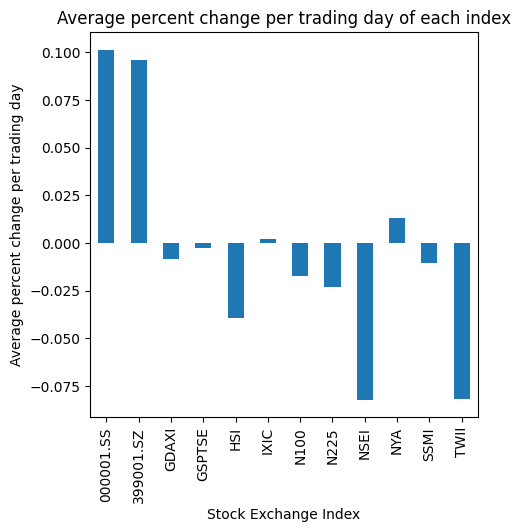

In [ ]:
table1 = temp.groupby('Index')['Symmetry_Percentage_Change'].mean()
plt.figure(figsize=(5, 5))
table1.plot(kind='bar')
plt.title('Average percent change per trading day of each index')
plt.xlabel('Stock Exchange Index')
plt.ylabel('Average percent change per trading day')
plt.show()

This Graph below shows how much average change in the (absolute) percentage change for each index is on any given day within the time range of the data (varies from 1900s-2021)

**Conclusion: The average absolute percentage change for each index is relatively the same.** Our best guess is that these there is a natural fluxuation in the price change of stocks indexes based on the news and how different people preceive these changes.

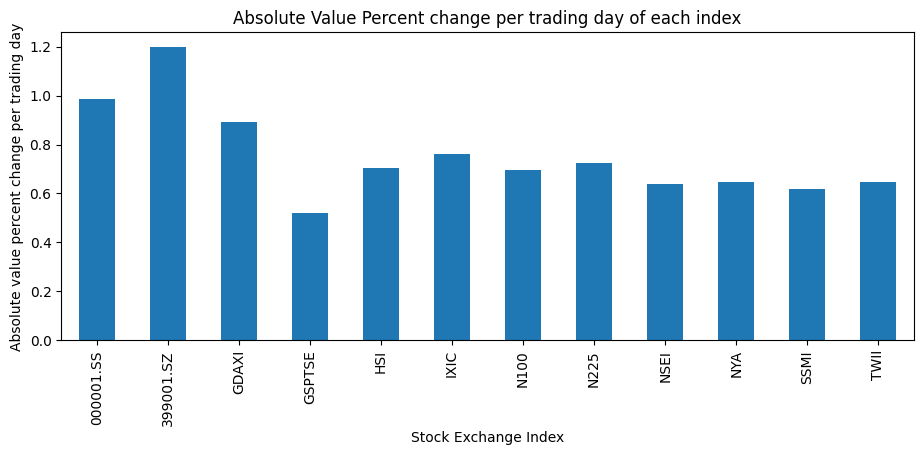

In [ ]:
# absolute value percent change
table2 = temp.groupby('Index')['Abs_Symmetry_Percentage_Change'].mean()

plt.figure(figsize=(11, 4))
table2.plot(kind='bar')
plt.title('Absolute Value Percent change per trading day of each index')
plt.xlabel('Stock Exchange Index')
plt.ylabel('Absolute value percent change per trading day')
plt.show()

This graph below displays the average volume there is for each stock index per trading day.

**Conclusion: There is a huge difference in the volumes of the different trading indexes.** Since each index measures different parts of the world stock trade, there is a variability. Possible Hypothesis we could explore: Indexes that contain more stocks have more volumes.


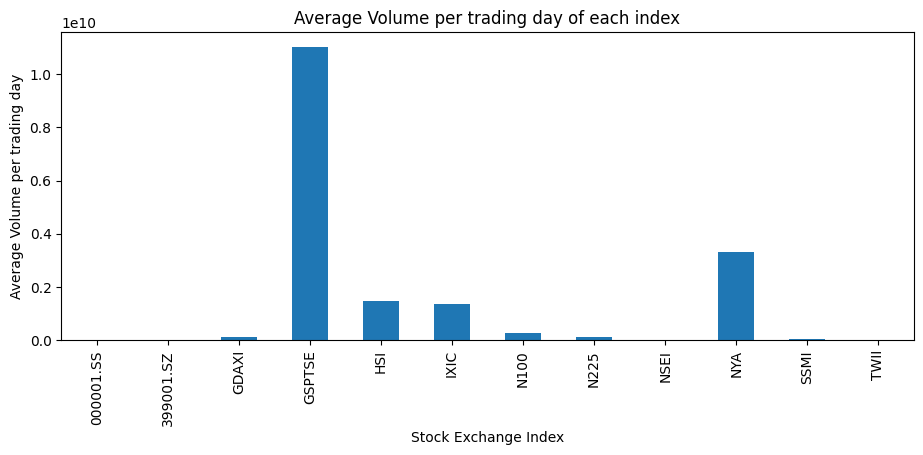

In [ ]:
table2 = temp.groupby('Index')['Volume'].mean()

plt.figure(figsize=(11, 4))
table2.plot(kind='bar')
plt.title('Average Volume per trading day of each index')
plt.xlabel('Stock Exchange Index')
plt.ylabel('Average Volume per trading day')
plt.show()

In [ ]:
scaler_abs_change = MinMaxScaler(feature_range=(0, 1))
scaler_volume = MinMaxScaler(feature_range=(0, 1))
temp['Abs_Change_Norm'] = temp.groupby('Index')['Abs_Symmetry_Percentage_Change'].transform(
    lambda x: scaler_abs_change.fit_transform(x.values.reshape(-1, 1))[:, 0]
)
temp['Volume_Norm'] = temp.groupby('Index')['Volume'].transform(
    lambda x: scaler_volume.fit_transform(x.values.reshape(-1, 1))[:, 0]
)
temp

Index       Date          Open          High           Low  \
25896       IXIC 1984-10-11    244.199997    244.699997    244.199997   
25897       IXIC 1984-10-12    245.500000    246.199997    245.500000   
25898       IXIC 1984-10-15    246.800003    247.699997    246.800003   
25899       IXIC 1984-10-16    247.800003    247.899994    247.100006   
25900       IXIC 1984-10-17    247.100006    247.100006    246.800003   
...          ...        ...           ...           ...           ...   
66026  399001.SZ 2021-06-01  14963.950200  15039.019530  14820.740230   
60266       N100 2021-06-01   1254.609985   1265.660034   1254.609985   
60267       N100 2021-06-02   1258.489990   1263.709961   1258.239990   
54792       N225 2021-06-02  28730.810550  29003.550780  28565.830080   
66027  399001.SZ 2021-06-02  15044.940430  15051.209960  14793.740230   

              Close     Adj Close       Volume     CloseUSD  Percent_Change  \
25896    244.699997    244.699997   62860000.0   244.699997        0.204750   
25897    246.199997    246.199997   58860000.0   246.199997        0.285131   
25898    247.699997    247.699997   61820000.0   247.699997        0.364665   
25899    247.300003    247.300003   57440000.0   247.300003       -0.201776   
25900    247.100006    247.100006   64670000.0   247.100006        0.000000   
...             ...           ...          ...          ...             ...   
66026  15034.780270  15034.780270    1515600.0  2405.564843        0.473338   
60266   1258.579956   1258.579956  155179900.0  1535.467546        0.316431   
60267   1263.619995   1263.619995  148465000.0  1541.616394        0.407632   
54792  28946.140630  28946.140630   71000000.0   289.461406        0.749474   
66027  14857.910160  14857.910160    1470800.0  2377.265626       -1.243144   

       Symmetry_Percentage_Change  Abs_Symmetry_Percentage_Change  \
25896                    0.204541                        0.204541   
25897                    0.284725                        0.284725   
25898                    0.364002                        0.364002   
25899                   -0.201979                        0.201979   
25900                    0.000000                        0.000000   
...                           ...                             ...   
66026                    0.472221                        0.472221   
60266                    0.315931                        0.315931   
60267                    0.406803                        0.406803   
54792                    0.746680                        0.746680   
66027                   -1.250936                        1.250936   

       Abs_Change_Norm  Volume_Norm  
25896         0.013732     0.002171  
25897         0.019115     0.001810  
25898         0.024437     0.002077  
25899         0.013560     0.001681  
25900         0.000000     0.002335  
...                ...          ...  
66026         0.046596     0.416884  
60266         0.041973     0.132263  
60267         0.054046     0.126462  
54792         0.064048     0.119286  
66027         0.123518     0.404561  

[62131 rows x 14 columns]

In [ ]:
t_statistic, p_value = ttest_ind(temp['Abs_Change_Norm'], temp['Volume_Norm'])
t_statistic, p_value

(-144.073106570444, 0.0)

**Conclusion: The 2 means of Absolute Value Change and Volume are statistically significantly different from each other since the p-value is less than 0.05.** There is no correlation here between all the stock indexes. With everything together, each stock index has its own different economies in different parts of the world. This p value of 0 makes perfect sense because the stock index behavior in asia, europe, austrialia, and united states should not be the same. Since some stock indexes have significantly higher volumes than others, this statistical test shows that we would need to compare the volume separately from the indexes.

In [ ]:
nya_df = temp[temp['Index'] == 'NYA']

nas_df = temp[temp['Index'] == 'IXIC']

t_statistic, p_value = ttest_ind(nya_df['Abs_Change_Norm'], nas_df['Abs_Change_Norm'])
t_statistic, p_value

(0.06358322134830982, 0.9493029779840652)

**Conclusion: The means of absolute value changes for the New York Stock Exchange (NYSE) and NASDAQ are not statistically significantly different because the p-value greater than 0.05. There is high correlation between these stock exachanges which makes sense because they are both stock indexes in the United States measuring many of the same stocks and economic conditions.**

Set up the separate index

In [ ]:
hsi_df = temp[temp['Index'] == 'HSI']
sh_df = temp[temp['Index'] == '000001.SS']
jp_df = temp[temp['Index'] == 'N225']
eu_df = temp[temp['Index'] == 'N100']
sz_df = temp[temp['Index'] == '399001.SZ']
to_df = temp[temp['Index'] == 'GSPTSE']
id_df = temp[temp['Index'] == 'NSEI']
fr_df = temp[temp['Index'] == 'GDAXI']
sw_df = temp[temp['Index'] == 'SSMI']
sa_df = temp[temp['Index'] == 'J203.JO']
tw_df = temp[temp['Index'] == 'TWII']

First plot graph of each index separately of their volume and Abs_Symmetry_Percentage_Change (updated)
Looks like 12 scatterplots: each point is a day (x:volume, y:Abs_Symmetry_Percentage_Change)
Add a line of best fit to see if there is a correlation
Use anova test on the line of best fit line? Or some other test

Null Hypothesis:  The amount of trading volume has no correlation to the percentage change in the price.
Alternate Hypothesis:  The amount of trading volume directly correlates to the percentage change in the price.


In [ ]:
bestfit_df = pd.DataFrame(columns=['Index', 'Slope', 'Intercept'])

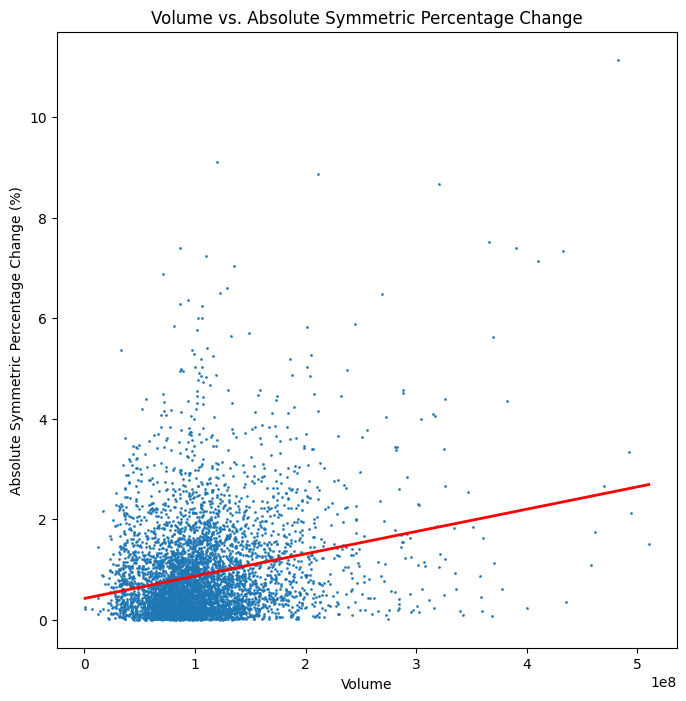

In [ ]:
Germanyindex_df = temp[temp['Index'] == 'GDAXI']
slope, intercept = np.polyfit(Germanyindex_df['Volume'], Germanyindex_df['Abs_Symmetry_Percentage_Change'], 1)
line_of_best_fit = np.poly1d([slope, intercept])
x_values = np.linspace(Germanyindex_df['Volume'].min(), Germanyindex_df['Volume'].max(), 100)
y_values = line_of_best_fit(x_values)
plt.figure(figsize=(8, 8))
plt.scatter(Germanyindex_df['Volume'], Germanyindex_df['Abs_Symmetry_Percentage_Change'], alpha = 0.9, s = 1)
plt.plot(x_values, line_of_best_fit(x_values), color='red', linewidth=2)
plt.title('Volume vs. Absolute Symmetric Percentage Change')
plt.xlabel('Volume')
plt.ylabel('Absolute Symmetric Percentage Change (%)')
plt.show()
# bestfit_df.loc[len(bestfit_df)] = ['Germany', slope, intercept]

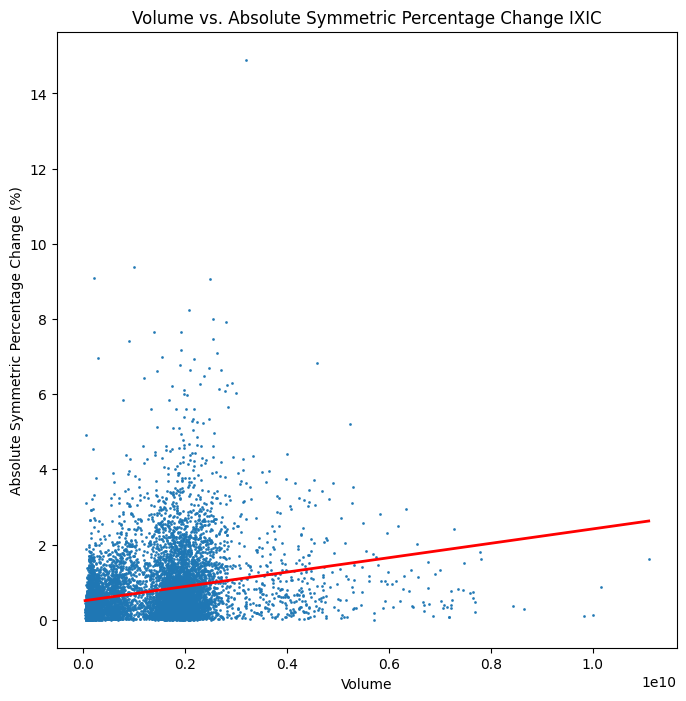

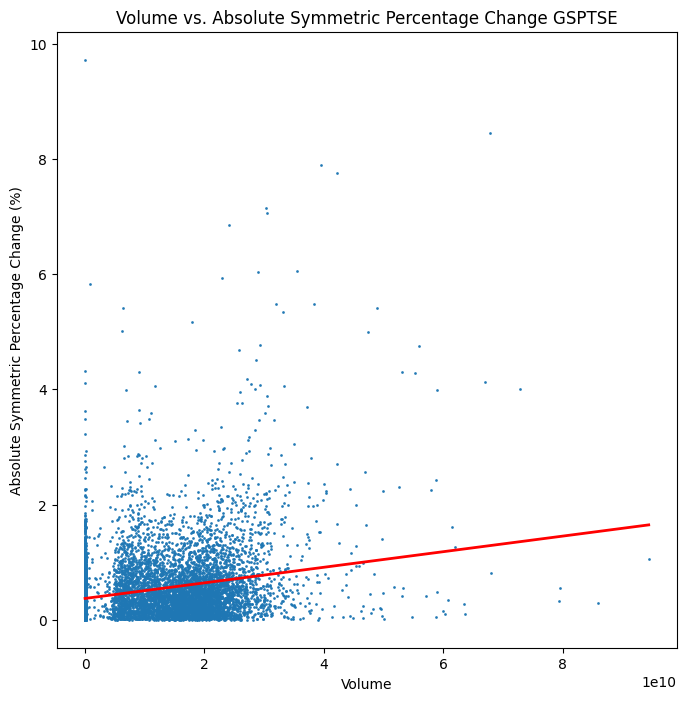

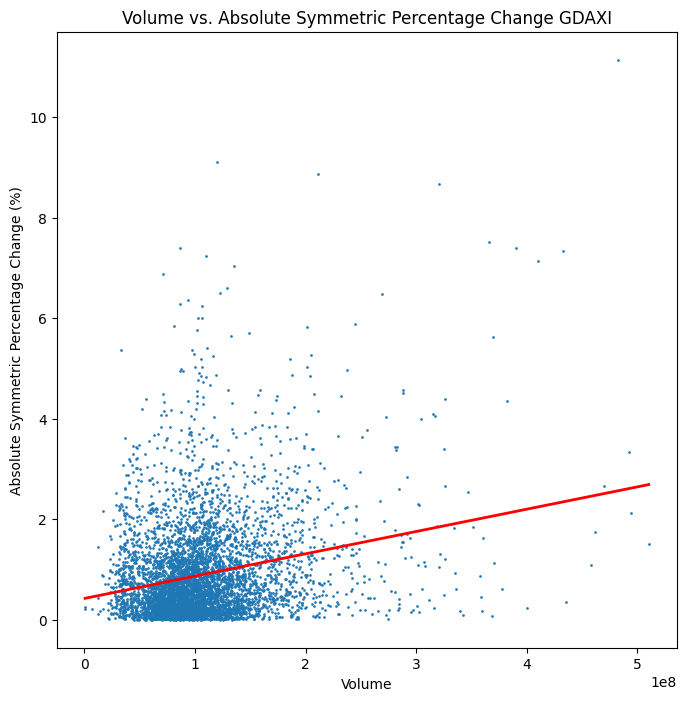

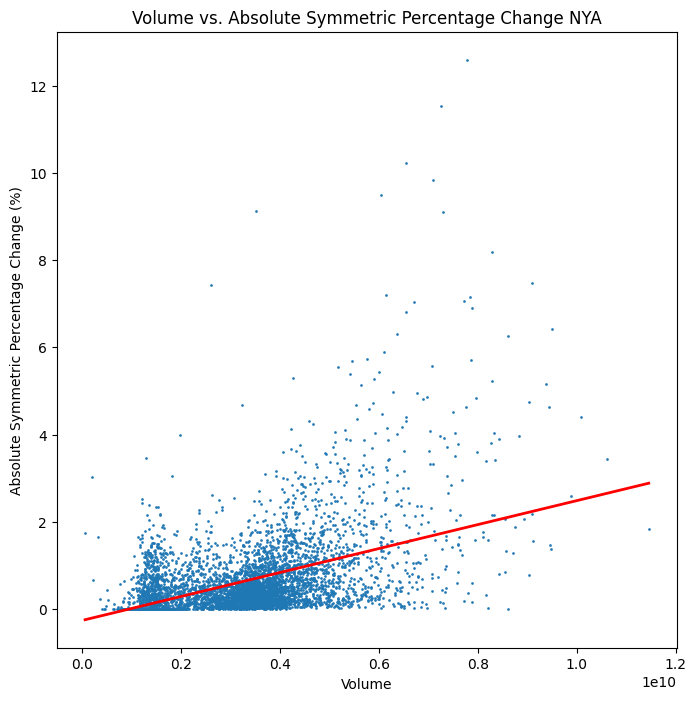

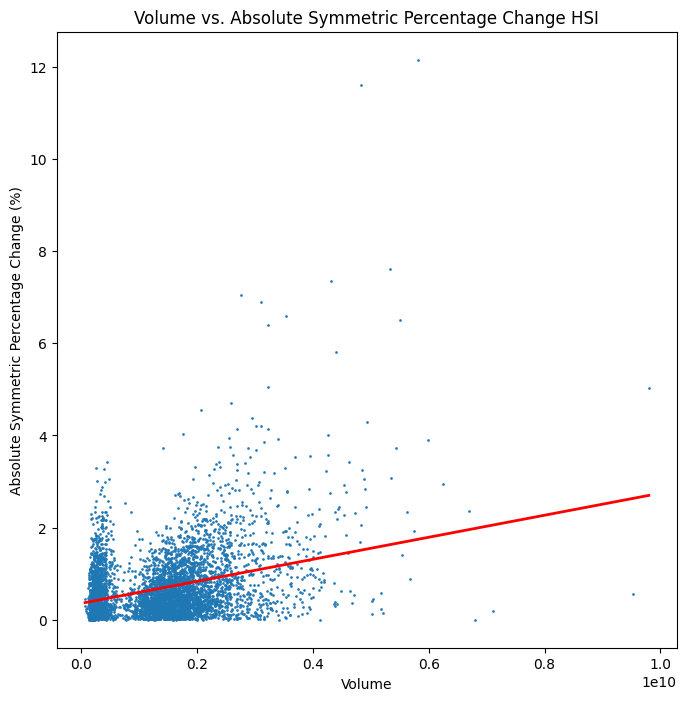

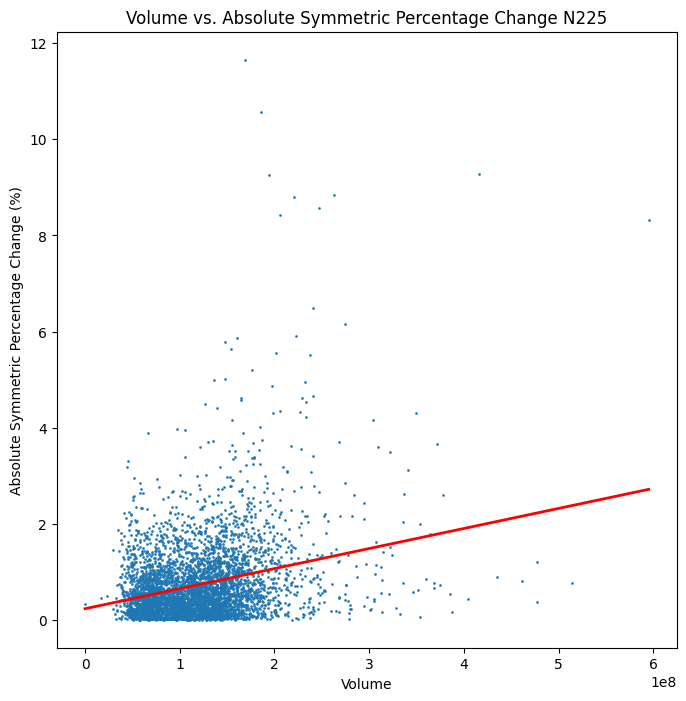

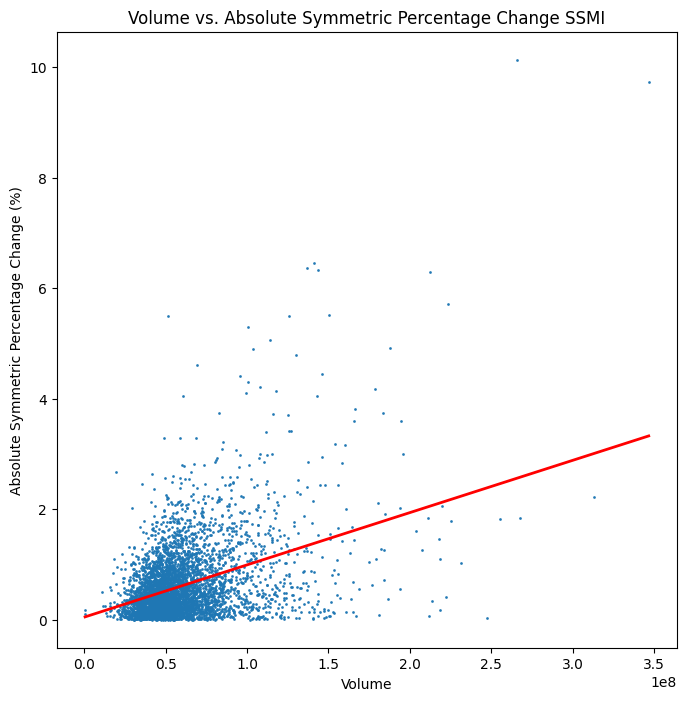

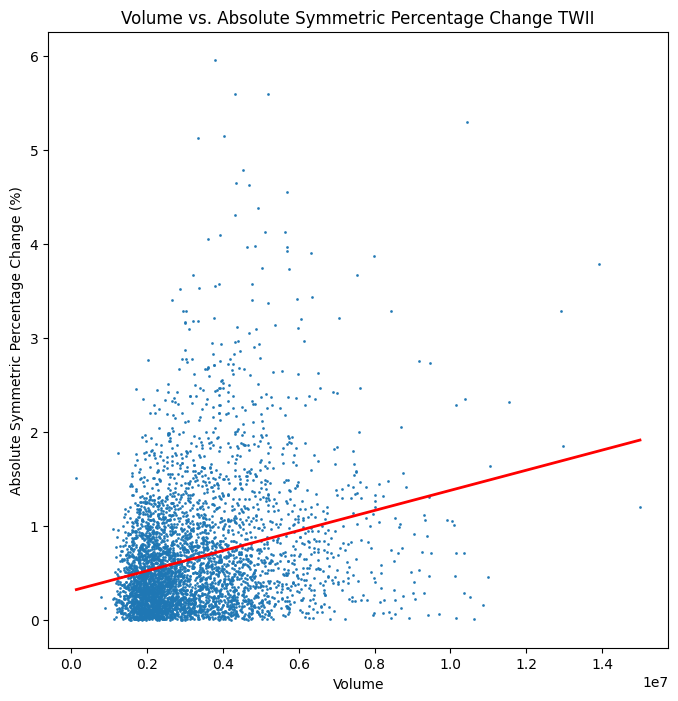

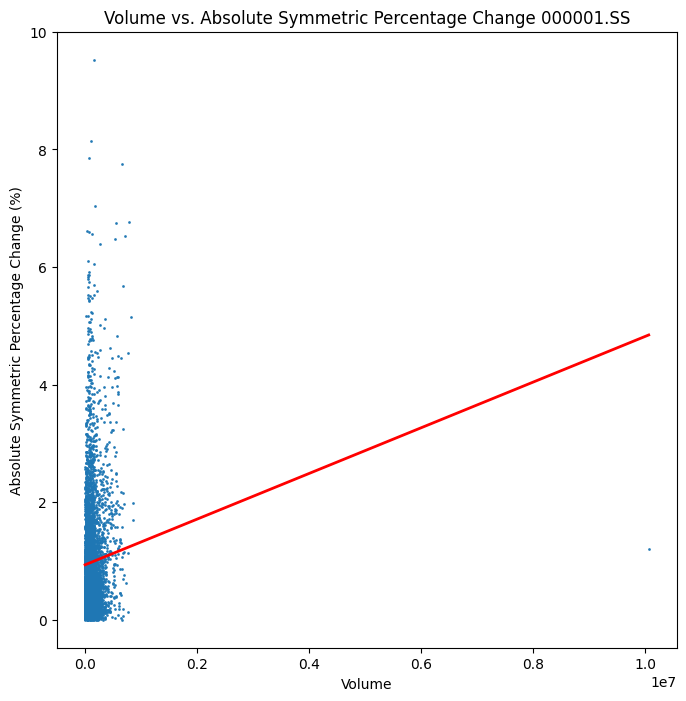

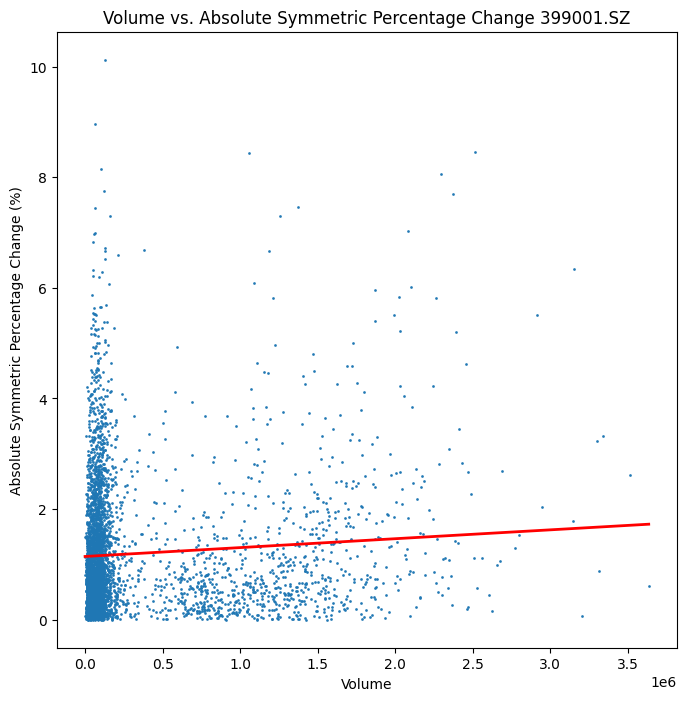

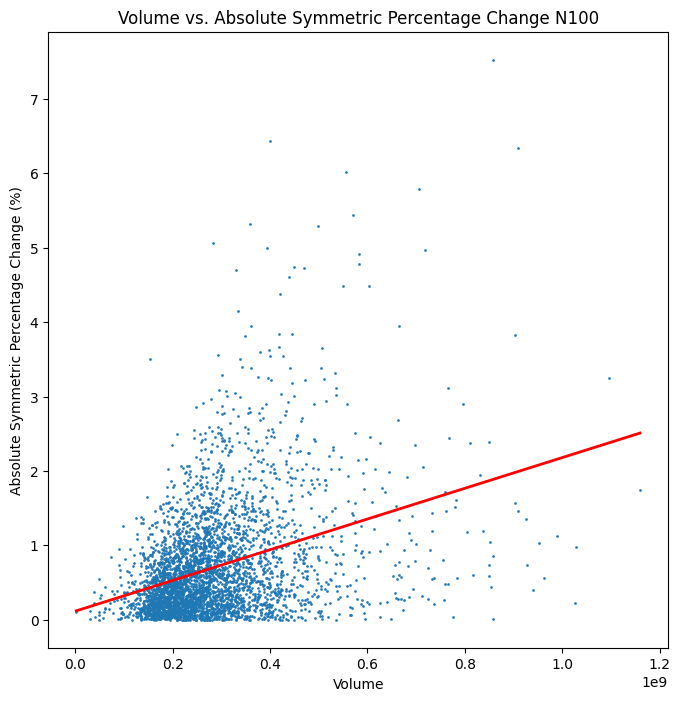

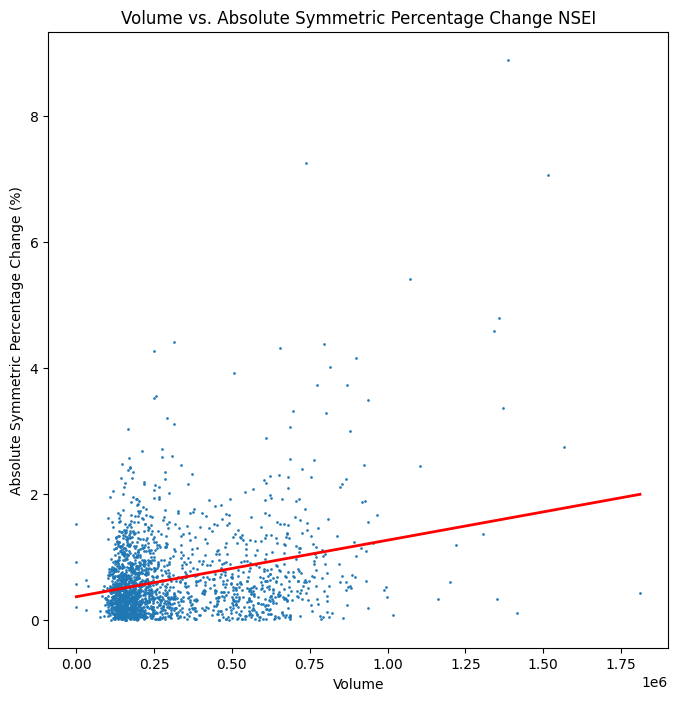

In [ ]:
unique_indexes = (temp['Index'].unique())

for index in unique_indexes:
    group_data = temp[temp['Index'] == index]
    slope, intercept = np.polyfit(group_data['Volume'], group_data['Abs_Symmetry_Percentage_Change'], 1)
    bestfit_df.loc[len(bestfit_df)] = [index, slope, intercept]
    line_of_best_fit = np.poly1d([slope, intercept])
    x_values = np.linspace(group_data['Volume'].min(), group_data['Volume'].max(), 100)
    y_values = line_of_best_fit(x_values)
    plt.figure(figsize=(8, 8))
    plt.scatter(group_data['Volume'], group_data['Abs_Symmetry_Percentage_Change'], alpha = 0.9, s = 1)
    plt.plot(x_values, line_of_best_fit(x_values), color='red', linewidth=2)
    plt.title('Volume vs. Absolute Symmetric Percentage Change {}'.format(index))
    plt.xlabel('Volume')
    plt.ylabel('Absolute Symmetric Percentage Change (%)')
    plt.show()


**Conclusion: Here we can see that all the index's slope is positive, showing that there is a positive correlation with volume and percent change of the stock. We fail to reject the Null Hypothesis because the p value is 0.574 which is greater than 0.05. This means the data does not deviate far enough from what is expected from the Null Hypothesis.**


This is the slopes of all the indexes when comparing the volume and absolute value change. Since the volume (millions) is really high compared to the percentage changes, the low slope coefficent makes sense. Hence this an explanation for how the p-value is so high dispite the low coeffient.


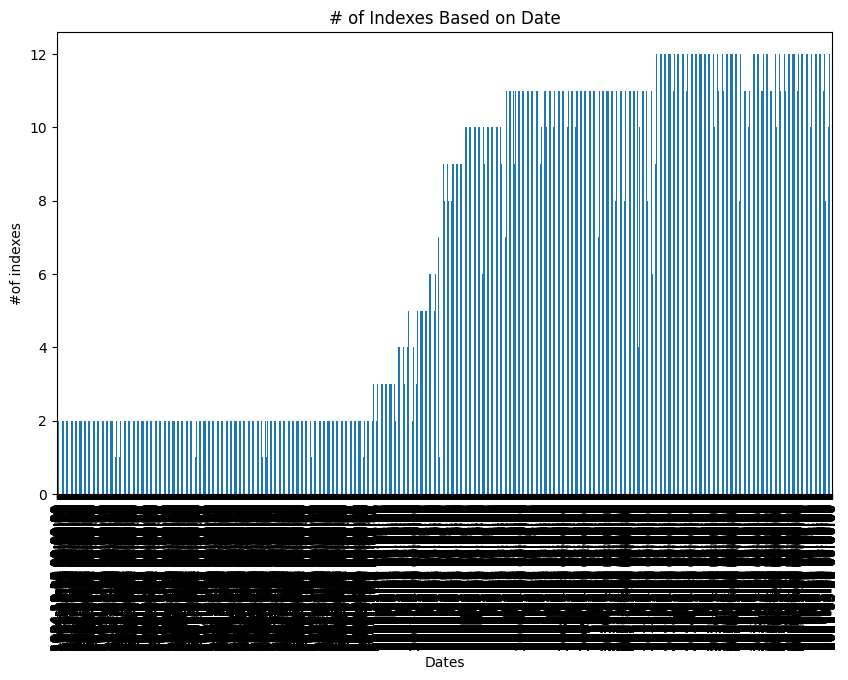

In [ ]:
dates_df = temp.groupby('Date').size()
plt.figure(figsize=(10, 6))
dates_df.plot(kind='bar', ax=plt.gca())
plt.title('# of Indexes Based on Date')
plt.xlabel('Dates')
plt.ylabel('#of indexes')
plt.show()

**Conclusion: As we can see here, the number of indexes found differs by date, but in general, we can see that the number of indexes increases the closer the date gets to the present.This makes sense because there were less stock exchanges back in the 20th century than there are now.**


In [ ]:
median_date = temp.sort_index(ascending=True).index[len(dates_df) // 2]
median_date = temp.loc[median_date, 'Date']
print("Median Date:", median_date)

Median Date: 2020-10-16 00:00:00


Null Hypothesis: The amount of trading volume has no correlation to the total price of the stock index.

Alternate Hypothesis: The amount of trading volume directly correlates to the total price of the stock index.

3.729290024131382e-06


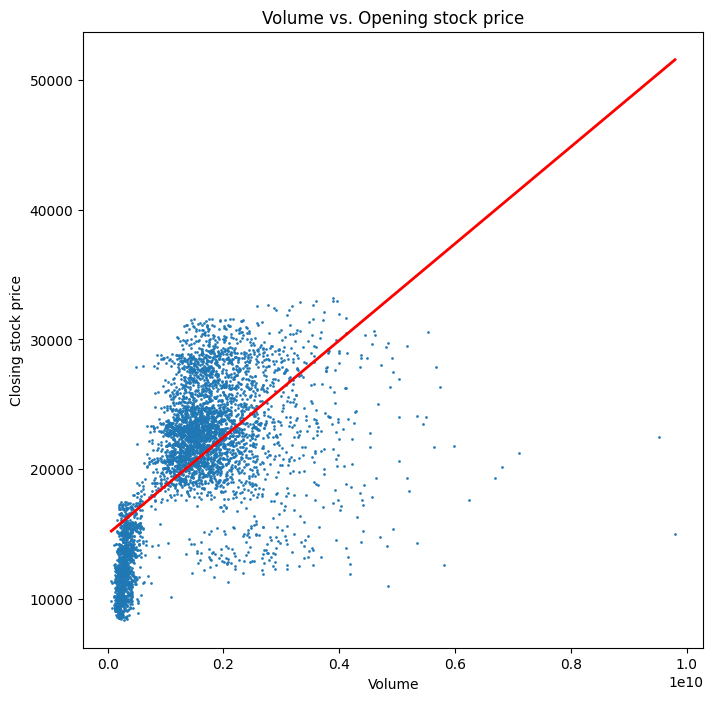

In [ ]:
Germanyindex_df = temp[temp['Index'] == 'HSI']
slope, intercept = np.polyfit(Germanyindex_df['Volume'], Germanyindex_df['Close'], 1)
print(slope)
line_of_best_fit = np.poly1d([slope, intercept])
x_values = np.linspace(Germanyindex_df['Volume'].min(), Germanyindex_df['Volume'].max(), 100)
y_values = line_of_best_fit(x_values)
plt.figure(figsize=(8, 8))
plt.scatter(Germanyindex_df['Volume'], Germanyindex_df['Close'], alpha = 0.9, s = 1)
plt.plot(x_values, line_of_best_fit(x_values), color='red', linewidth=2)
plt.title('Volume vs. Opening stock price')
plt.xlabel('Volume')
plt.ylabel('Closing stock price')
plt.show()

Conclusion: The positive slope coeefficent means that there is a positive correlation between an increase in the volume and an increase in the change of index price. The slope coeefficent is 3.7*10^-6 which may look very low but in context of an average of 4 billions stock trades today, this value is pretty high. This increase of volume causing an increase in closing price could possbily mean that more volume means more activity and therefore more money put into the stock index. Possible Explanation: As the stock index grows, so does the amount of people trading in it. Let's look at more graphs to get a more solid conclusion.

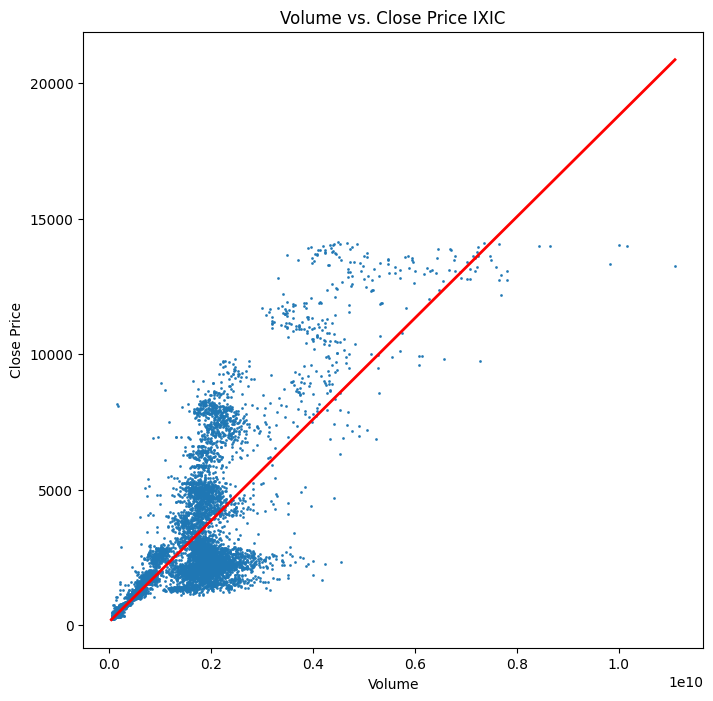

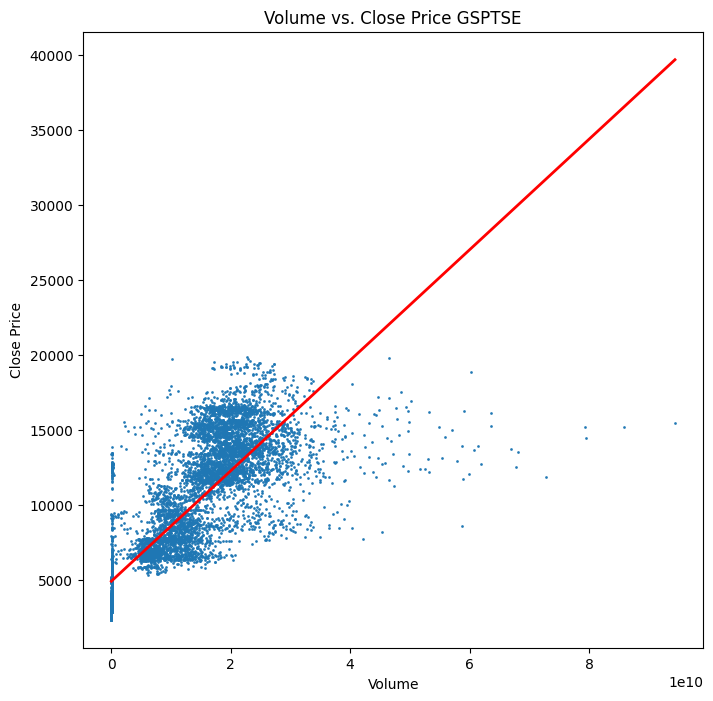

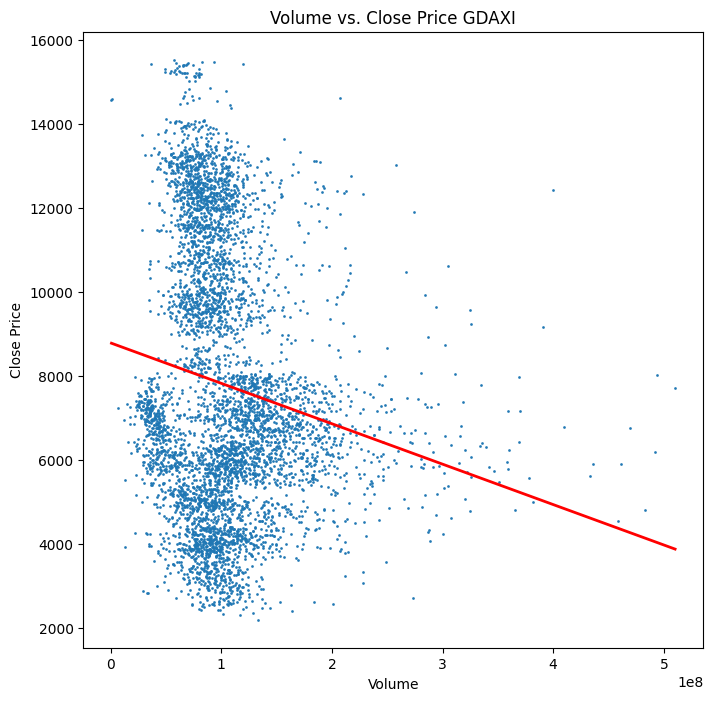

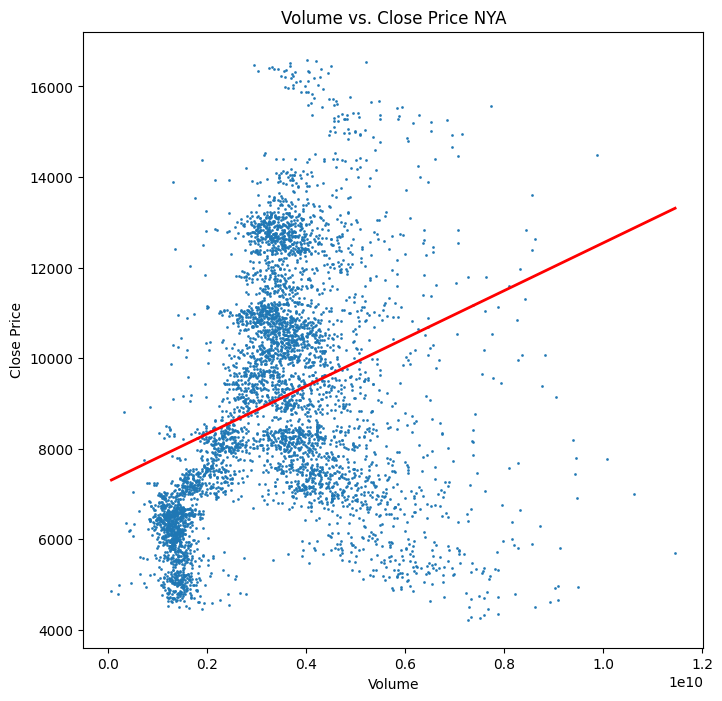

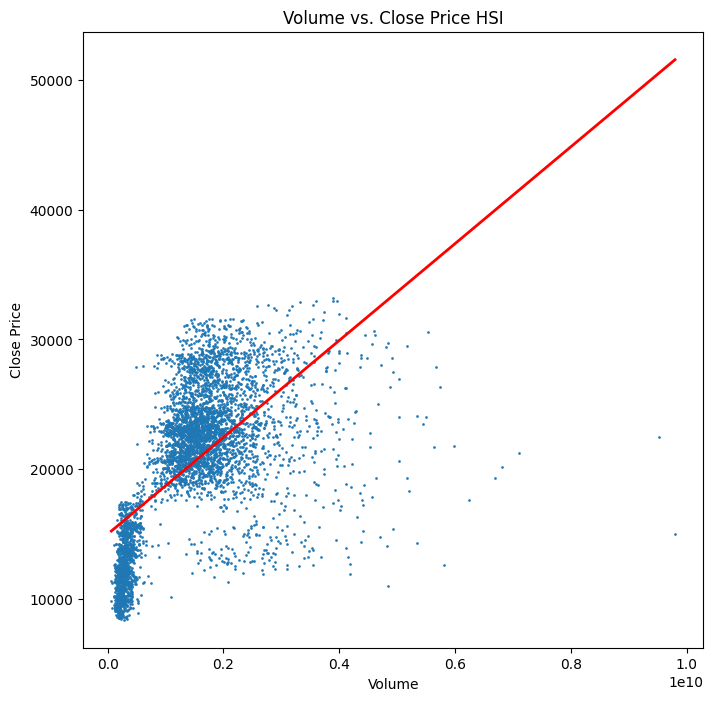

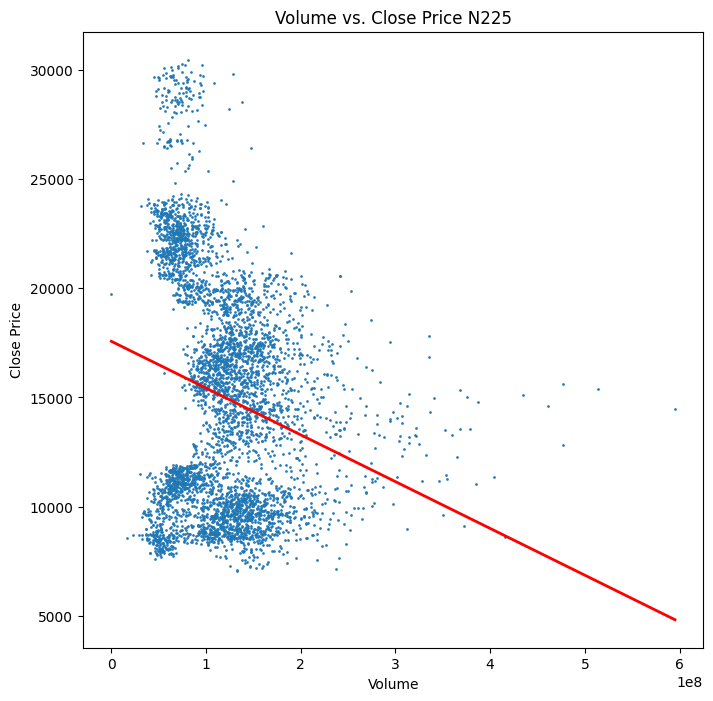

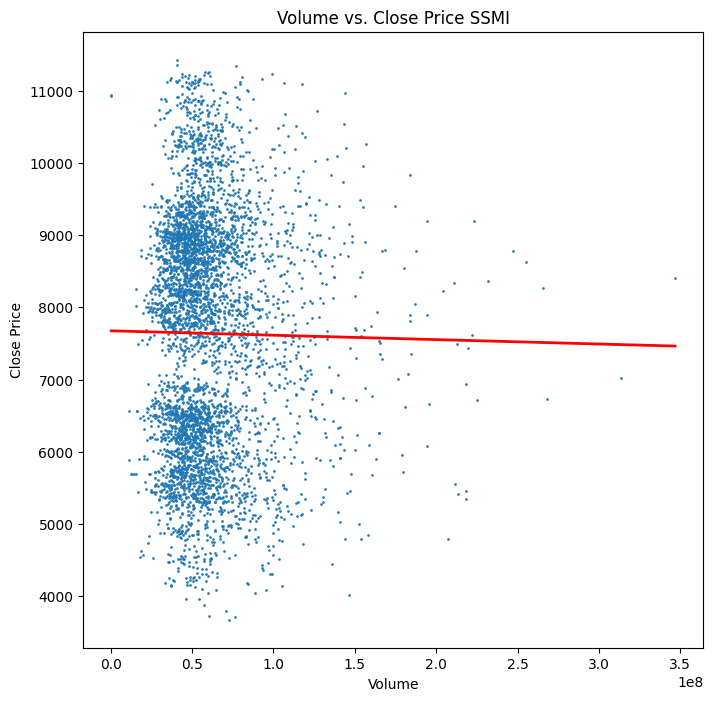

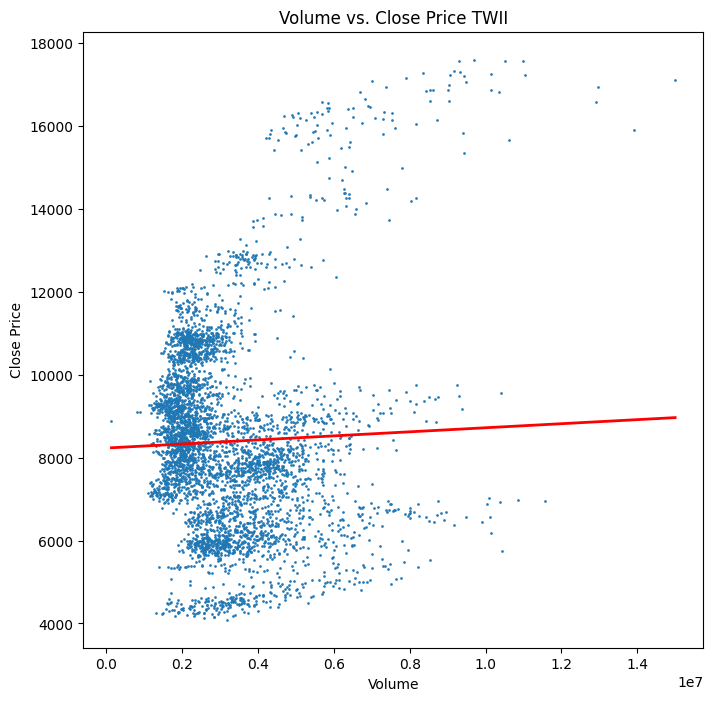

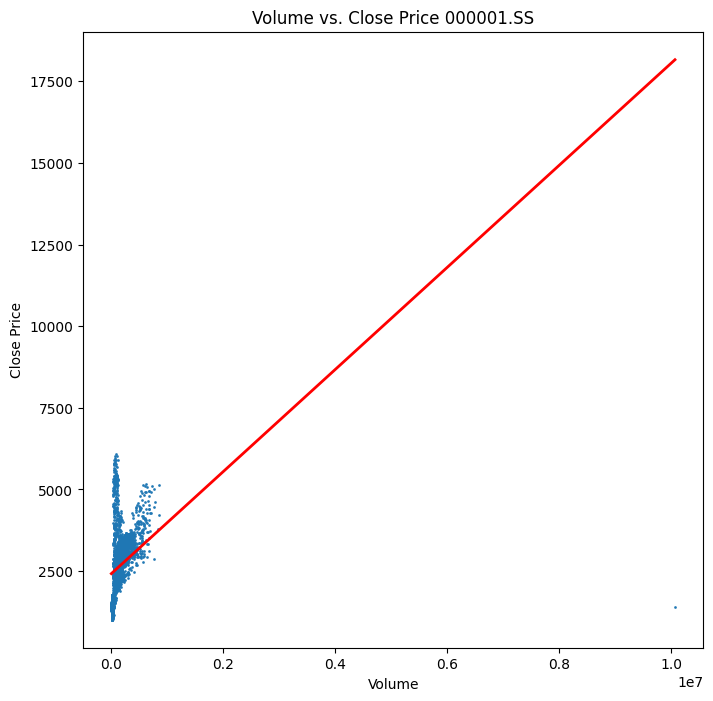

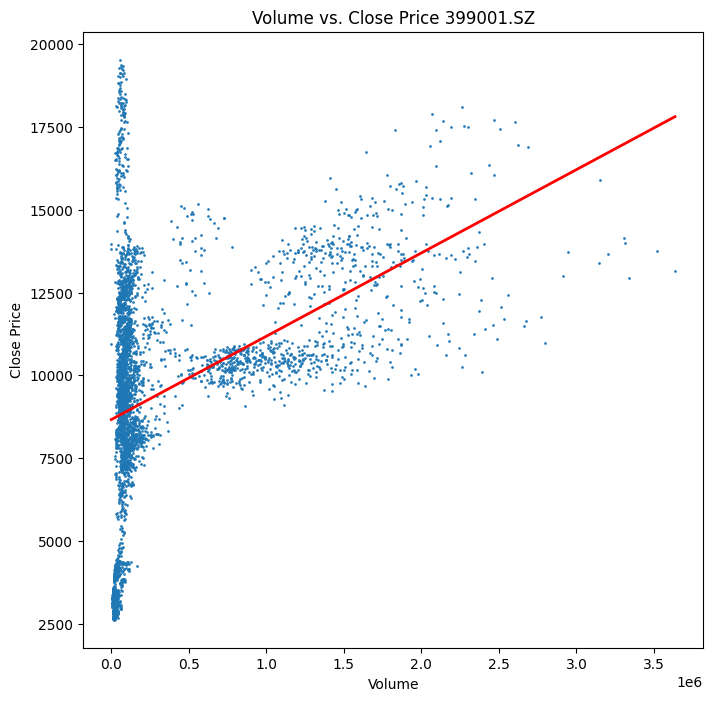

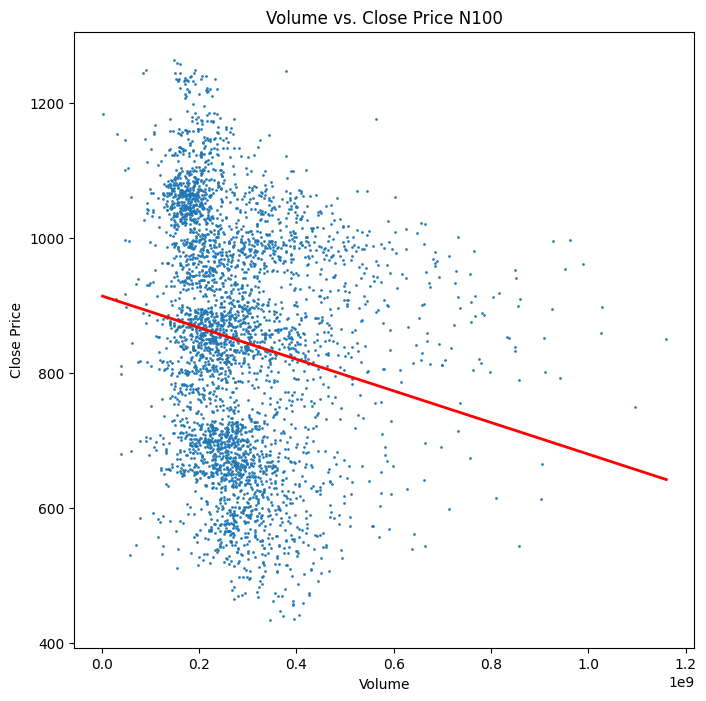

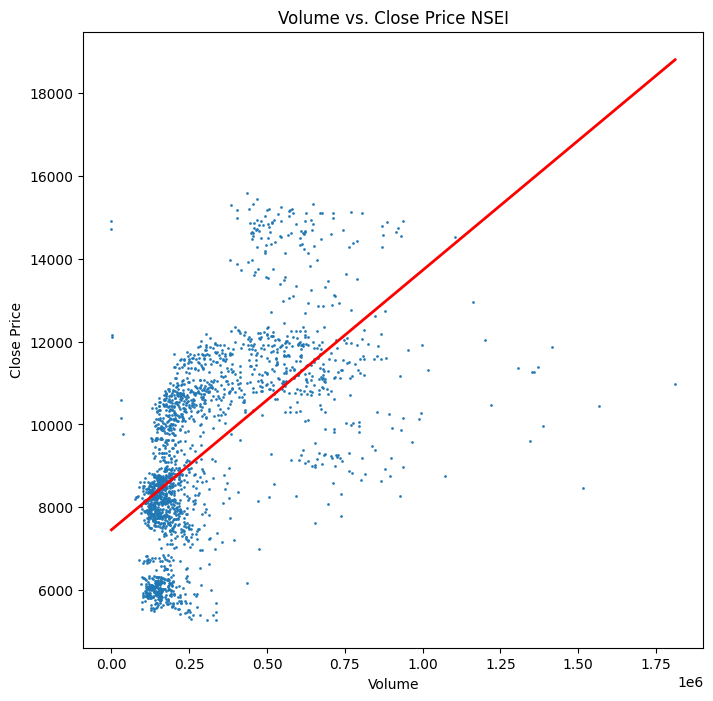

In [ ]:
unique_indexes = (temp['Index'].unique())
vol_price_bestfit_df = pd.DataFrame(columns=['Index', 'Slope', 'Intercept'])

for index in unique_indexes:
    group_data = temp[temp['Index'] == index]
    slope, intercept = np.polyfit(group_data['Volume'], group_data['Close'], 1)
    vol_price_bestfit_df.loc[len(vol_price_bestfit_df)] = [index, slope, intercept]
    line_of_best_fit = np.poly1d([slope, intercept])
    x_values = np.linspace(group_data['Volume'].min(), group_data['Volume'].max(), 100)
    y_values = line_of_best_fit(x_values)
    plt.figure(figsize=(8, 8))
    plt.scatter(group_data['Volume'], group_data['Close'], alpha = 0.9, s = 1)
    plt.plot(x_values, line_of_best_fit(x_values), color='red', linewidth=2)
    plt.title('Volume vs. Close Price {}'.format(index))
    plt.xlabel('Volume')
    plt.ylabel('Close Price')
    plt.show()

In [ ]:
vol_price_bestfit_df

Index         Slope     Intercept
0        IXIC  1.867633e-06    128.936593
1      GSPTSE  3.682581e-07   4901.778841
2       GDAXI -9.609375e-06   8785.299975
3         NYA  5.265960e-07   7278.792454
4         HSI  3.729290e-06  15000.595981
5        N225 -2.142663e-05  17569.991422
6        SSMI -6.095310e-07   7674.215785
7        TWII  4.890989e-05   8230.520640
8   000001.SS  1.564012e-03   2417.413441
9   399001.SZ  2.515853e-03   8665.800609
10       N100 -2.344792e-07    914.076175
11       NSEI  6.268746e-03   7455.609856

Here we see all the slope coefficents of the different indexes. We see that some slope coefficents are negative, some are negative but the most important statistic is that all of them are very close to zero. As based off these slope coefficent values, it seems that there is not a clear set trend. This makes sense because the definition for volume is the number of trades, not the value of the trades. If the volume were to also include the value of the trades, we would probably see an increase in closing price of the index when there are increases in the volume. Since volume doesn't account for the value of the trades, it makes sense that there is no clear trend between increases in volumes and increases in in the closing price index.

**Conclusion: We conclude that the change in volume of a stock index has no strong correlation with the closing price of that index. These two variables represent different aspects of the stock market and are not directly correlated.**

**Final Data Exploratory Analysis Conclusions:**

1. **We concluded that since the each index has different volumes due to their representations of different economies, we would need to separate the indexes to do analysis separately.**
2. **To show conclusive proof that comparing all the indexes together for analysis won't work, we did a many statistical tests including a p value test in which we got a p value of 0 meaning very very nearly impossible chance that there is correlation between volume and price changes when averaging and comparing all the indexes together as one set of data.**
3. **We concluded that there is in fact some sort of relationship between the change in the volume and the price change when comparing the indexes separately by apply statistical tests and modeling. We showed through the lines of best fit the evidence for volume and price change does exist and is positive.**

**Evidence:
We used 3 t-tests, a bunch of graphs, slope coefficents, and many other statistical tests and analysis.**

# Primary Analysis & Visualization

After exploring our data and seeing its complex nature, it is apparent that a complex machine learning model is necessary in order to capture any patterns in the data. In our previous graphs, we tried using a best fit line, but the line is clearly very accurate. This has to do with how stocks change within each market. Stocks' values can either increase, decrease, or stay level. As such, we believed the best possible model to use would be a neural network. However, we had to utilize a specific neural network: LSTM (Long Short-Term Model). This is because a traditional neural network would not be able to learn and be trained based on data over time. Our goal is to create a model that uses a specified amount of previous' days data (in our case, the previous 30 days), in order to predict the next day's opening and closing price for each market. We found this model after searching for other programmers' approaches to similar topics, and after reading on some of its uses online on various websites, we determined this would be the best model possible for our project.

We also made the decision to have a code block for each specific stock index in order to reduce runtime. While this does lead to code duplication, it also ensures that results for each index can be compartmentalized and ran independently of each other as we create the model for each specific index. This decision also allows us to not need to standardize the data and currencies across exchanges since they are all contained within their own context. This also explains why the loss and MAE are so high; they are not percentages. They are concrete monetary values. And finally, because of the code duplication, only the first example will be explained in depth since the rest is the exact same code except with the ``` df_to_use ``` changed for each stock exchange's corresponding dataframe.


Here we are listing the training features and target that we want the model to be trained on and predict, respectively. There are only 2 features because after our performing our EDA above, we did not find a relationship between many of the other variables with each other, so the best course of action was to simply use the same labels for both the training features and target predictions.

In [ ]:
features = ['Open', 'Close']
target = ['Open', 'Close']

**This is the one line of code that is modified between the following code blocks of the same code so that we could make the process easier.**

In [ ]:
df_to_use = nya_df

This is the number of previous days we will train our model on, i.e. the length of the sequence the LSTM will be trained on.

In [ ]:
sequence_length = 30

Here we have our function that creates the X and y variables for the input and output features. Essentially, each row up until the sequence length i.e. the previous 30 rows' data of "Open" and "Close" are added to the X list, and those values for the next day after are added to the y list

In [ ]:
# Defining the function to create sequences for LSTM (Long Short Term Memory)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length][features].values)
        y.append(data.iloc[i+seq_length][target].values)
    return np.array(X), np.array(y)

The comments in the block below are self-explanatory

In [ ]:
# Creating the sequences and test/train data sets
X, y = create_sequences(df_to_use, sequence_length)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Then, we actually create our model using the data we created above. This was done after researching how to use Sequential, looking at previous homeworks, and reading the documentation for LSTM. The Dense has 2 as the parameter because of our 2 training features.

In [ ]:
# Defining the LSTM model with 2 variables, open and close
model = Sequential([
        LSTM(50, activation='relu', input_shape=(sequence_length, len(features))),
        Dense(2)
    ])

Here we specify the different functions used for the optimizer, loss, and metrics to evaluate our model later.

In [ ]:
# Compile the model and setting the train and test to np array and float32
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Now, we convert the data types into usable formats that can be passed into the ```fit``` function.

In [ ]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

Train the model using 100 epochs in order to have a properly functioning model, and evaluate its performance.

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Index {df_to_use['Index']}: Test MAE: {mae}")

32/32 [==============================] - 0s 8ms/step - loss: 422073.6562 - mae: 397.9069
Index 17306    NYA
17307    NYA
17308    NYA
17309    NYA
17310    NYA
        ... 
22434    NYA
22435    NYA
22436    NYA
22437    NYA
22438    NYA
Name: Index, Length: 5115, dtype: object: Test MAE: 397.9068908691406


Finally, we predict the model's output for the immediate next day

In [ ]:
# Prediction
index = df_to_use['Index'].iloc[0]
data = temp[temp['Index'] == index].iloc[-sequence_length:]
sequence = np.array([data[features].values])
prediction = model.predict(sequence)
print(f"\nPrediction for Index {index}:")
print("Predicted Open:", prediction[0][0])
print("Predicted Close:", prediction[0][1])

1/1 [==============================] - 0s 254ms/step

Prediction for Index NYA:
Predicted Open: 16294.204
Predicted Close: 16315.336


We predict the next day's opening and closing price and put it on a graph to visualize the data, and see that it is in a very reasonable range and follows the trend of the data.

1/1 [==============================] - 0s 38ms/step


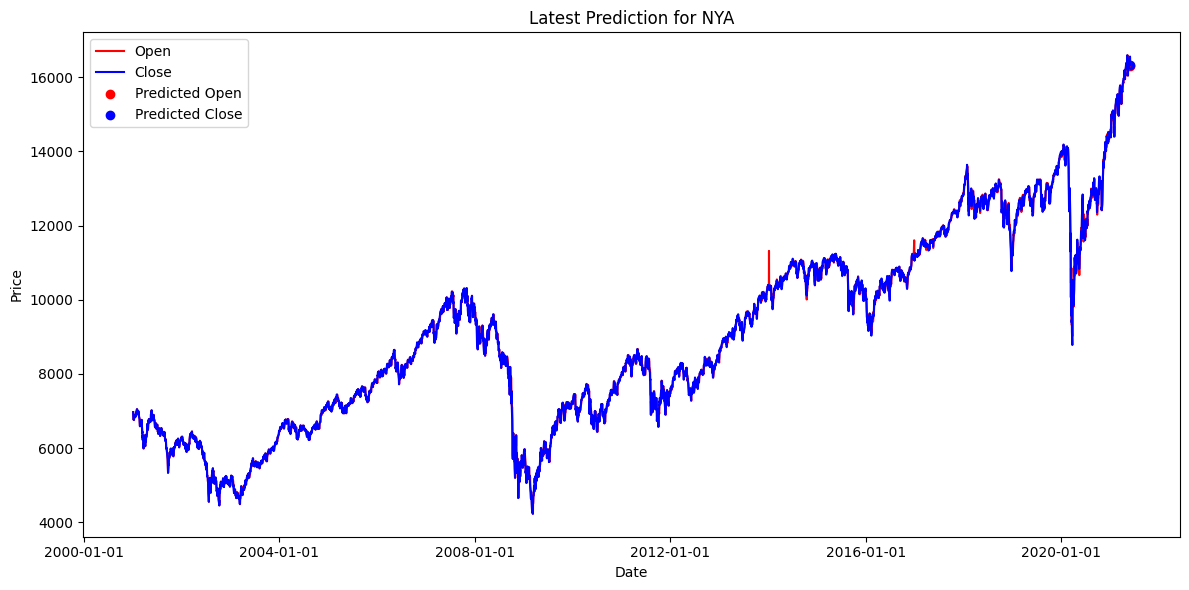

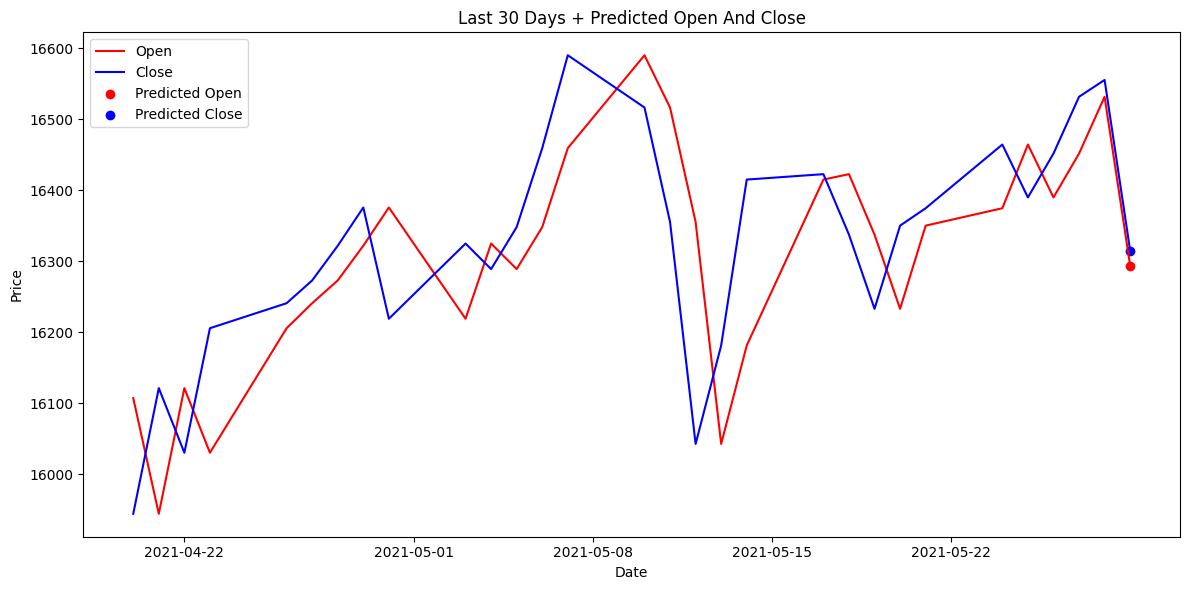

In [ ]:
from matplotlib.dates import DateFormatter

open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

# Make predictions for the next day
last_date = df_to_use.iloc[-(sequence_length):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

# Getting the previous date and adding one day
last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

# Adding predicted open and close to the dataframe to use for the next day
open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

# Graphing the opening and closing prices
plt.figure(figsize=(12, 6))
plt.plot(open_close_df['Date'], open_close_df['Open'], label='Open', color='red')
plt.plot(open_close_df['Date'], open_close_df['Close'], label='Close', color='blue')
plt.scatter(last_date, open_close_df['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, open_close_df['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"Latest Prediction for {df_to_use['Index'].head(1).values[0]}")
plt.legend()
plt.tight_layout()
plt.show()

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Predicted Open And Close')
plt.legend()
plt.tight_layout()
plt.show()

After that, we again do a prediction with the model, but this time, we will take 30 days previous to the last day to predict the actual last day we already have data on and compare it to the actual opening and closing to see how much it differs.

1/1 [==============================] - 0s 179ms/step


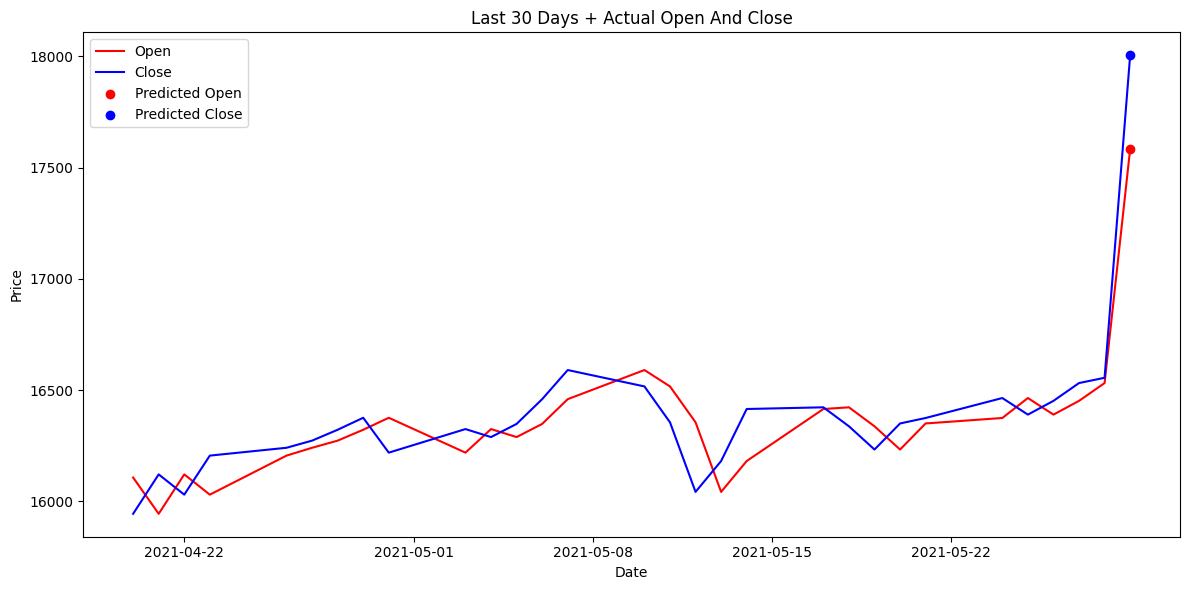

array([[17583.465, 18004.535]], dtype=float32)

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length + 1):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Actual Open And Close')
plt.legend()
plt.tight_layout()
plt.show()
last_prediction

Below is the rest of the stock indices and the code for the data, model, and visualization combined into 1 code block per index.

In [ ]:
features = ['Open', 'Close']
target = ['Open', 'Close']

df_to_use = nas_df

sequence_length = 30

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length][features].values)
        y.append(data.iloc[i+seq_length][target].values)
    return np.array(X), np.array(y)

scaler = StandardScaler()

X, y = create_sequences(df_to_use, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential([
        LSTM(50, activation='relu', input_shape=(sequence_length, len(features))),
        Dense(2)
    ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

loss, mae = model.evaluate(X_test, y_test)
print(f"Index {df_to_use['Index']}: Test MAE: {mae}")

index = df_to_use['Index'].iloc[0]
data = temp[temp['Index'] == index].iloc[-sequence_length:]
sequence = np.array([data[features].values])
prediction = model.predict(sequence)
print(f"\nPrediction for Index {index}:")
print("Predicted Open:", prediction[0][0])
print("Predicted Close:", prediction[0][1])

58/58 [==============================] - 0s 6ms/step - loss: 7383.0723 - mae: 52.5402
Index 25896    IXIC
25897    IXIC
25898    IXIC
25899    IXIC
25900    IXIC
         ... 
35124    IXIC
35125    IXIC
35126    IXIC
35127    IXIC
35128    IXIC
Name: Index, Length: 9233, dtype: object: Test MAE: 52.540164947509766


1/1 [==============================] - 0s 186ms/step

Prediction for Index IXIC:
Predicted Open: 13725.474
Predicted Close: 13751.976


1/1 [==============================] - 0s 25ms/step


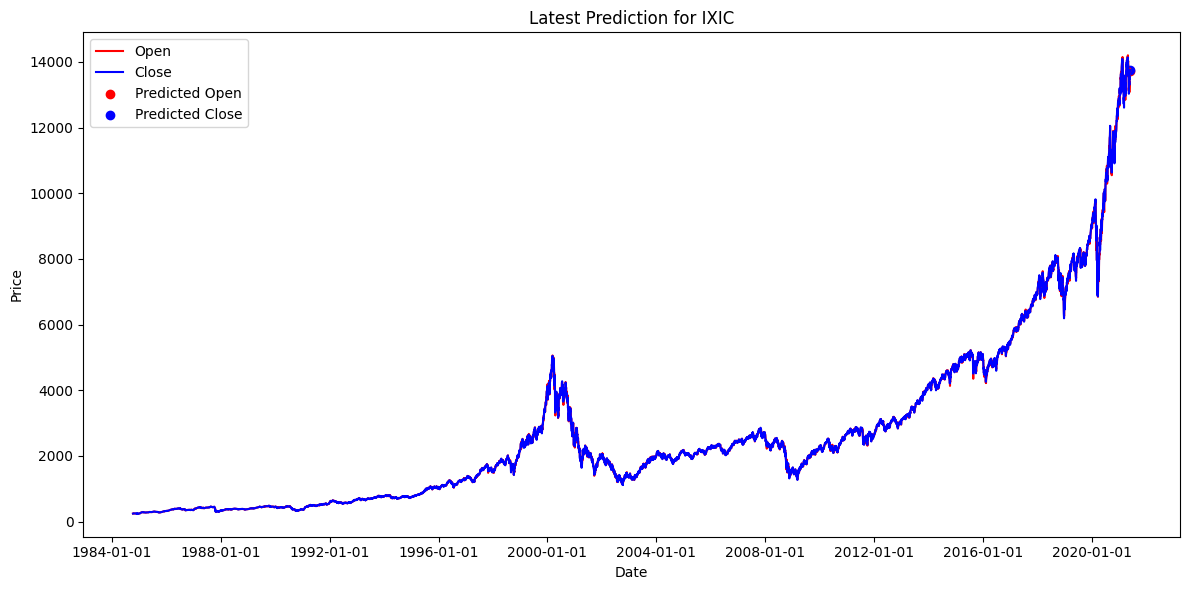

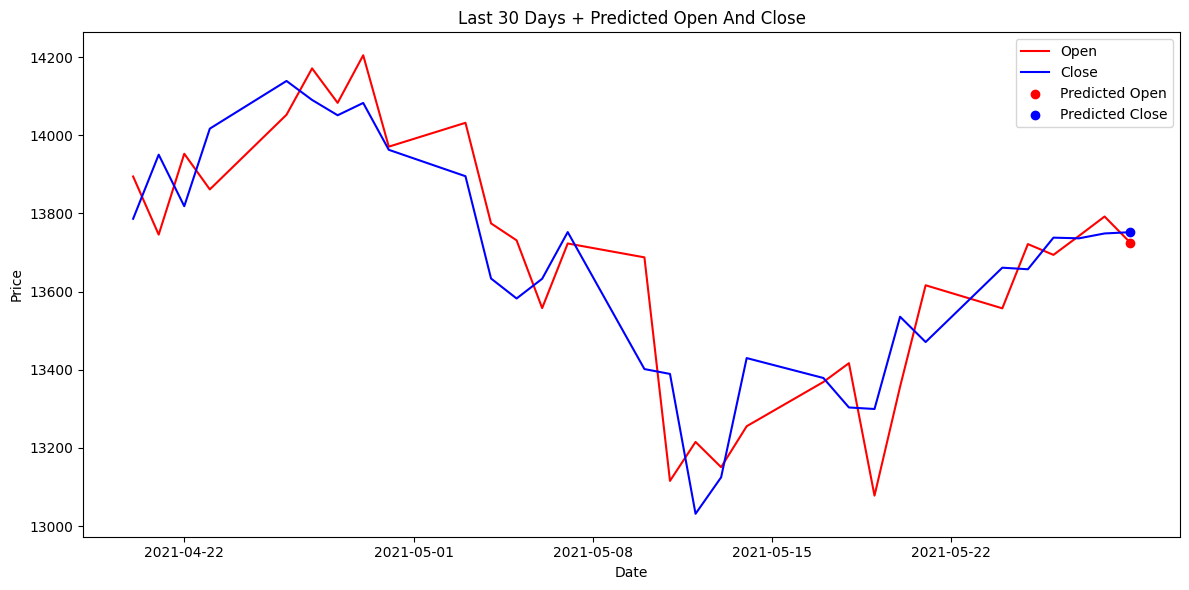

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

plt.figure(figsize=(12, 6))
plt.plot(open_close_df['Date'], open_close_df['Open'], label='Open', color='red')
plt.plot(open_close_df['Date'], open_close_df['Close'], label='Close', color='blue')
plt.scatter(last_date, open_close_df['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, open_close_df['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"Latest Prediction for {df_to_use['Index'].head(1).values[0]}")
plt.legend()
plt.tight_layout()
plt.show()

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Predicted Open And Close')
plt.legend()
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 194ms/step


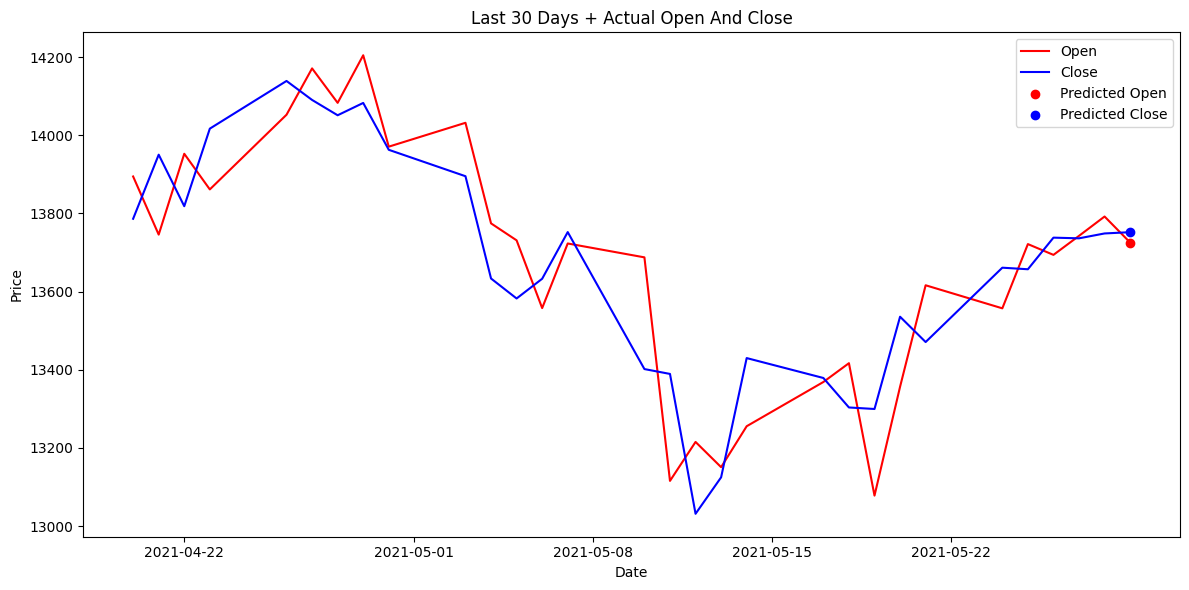

array([[13725.474, 13751.977]], dtype=float32)

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length + 1):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Actual Open And Close')
plt.legend()
plt.tight_layout()
plt.show()
last_prediction

In [ ]:
features = ['Open', 'Close']
target = ['Open', 'Close']

df_to_use = hsi_df

sequence_length = 30

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length][features].values)
        y.append(data.iloc[i+seq_length][target].values)
    return np.array(X), np.array(y)

scaler = StandardScaler()

X, y = create_sequences(df_to_use, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential([
        LSTM(50, activation='relu', input_shape=(sequence_length, len(features))),
        Dense(2)
    ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

loss, mae = model.evaluate(X_test, y_test)
print(f"Index {df_to_use['Index']}: Test MAE: {mae}")

index = df_to_use['Index'].iloc[0]
data = temp[temp['Index'] == index].iloc[-sequence_length:]
sequence = np.array([data[features].values])
prediction = model.predict(sequence)
print(f"\nPrediction for Index {index}:")
print("Predicted Open:", prediction[0][0])
print("Predicted Close:", prediction[0][1])

31/31 [==============================] - 0s 6ms/step - loss: 642394.7500 - mae: 614.7574
Index 3590    HSI
3591    HSI
3592    HSI
3593    HSI
3594    HSI
       ... 
8487    HSI
8488    HSI
8489    HSI
8490    HSI
8491    HSI
Name: Index, Length: 4890, dtype: object: Test MAE: 614.7573852539062
1/1 [==============================] - 0s 202ms/step

Prediction for Index HSI:
Predicted Open: 28574.338
Predicted Close: 28551.516


1/1 [==============================] - 0s 24ms/step


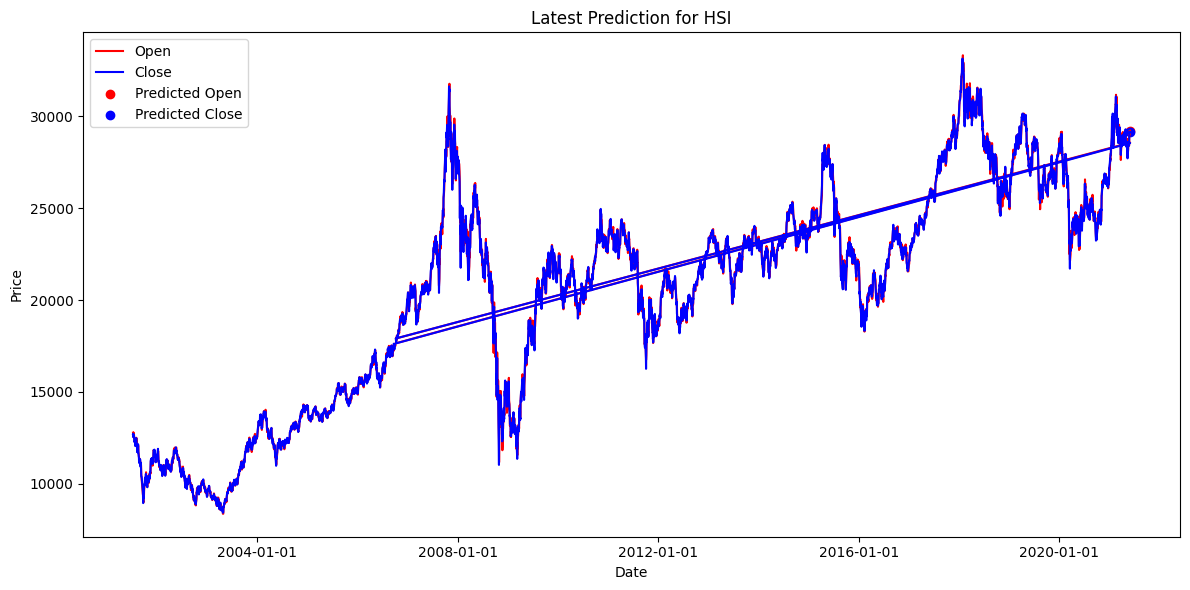

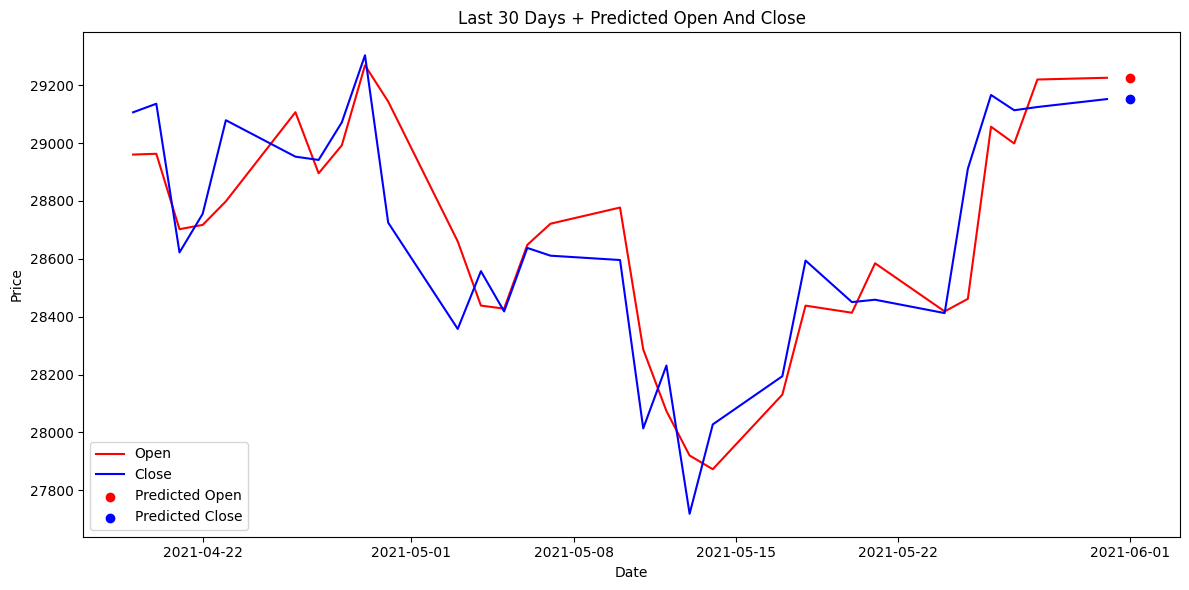

array([[28574.338, 28551.516]], dtype=float32)

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

plt.figure(figsize=(12, 6))
plt.plot(open_close_df['Date'], open_close_df['Open'], label='Open', color='red')
plt.plot(open_close_df['Date'], open_close_df['Close'], label='Close', color='blue')
plt.scatter(last_date, open_close_df['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, open_close_df['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"Latest Prediction for {df_to_use['Index'].head(1).values[0]}")
plt.legend()
plt.tight_layout()
plt.show()

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Predicted Open And Close')
plt.legend()
plt.tight_layout()
plt.show()
last_prediction

1/1 [==============================] - 0s 177ms/step


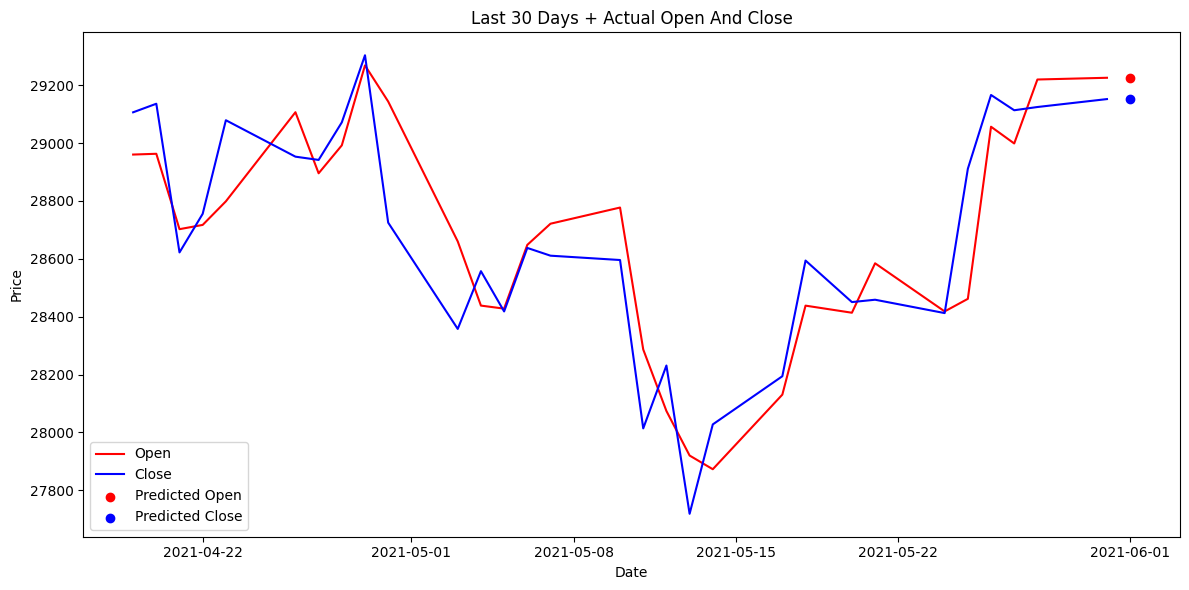

array([[28530.895, 28100.67 ]], dtype=float32)

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length + 1):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Actual Open And Close')
plt.legend()
plt.tight_layout()
plt.show()
last_prediction

In [ ]:
features = ['Open', 'Close']
target = ['Open', 'Close']

df_to_use = sh_df

sequence_length = 30

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length][features].values)
        y.append(data.iloc[i+seq_length][target].values)
    return np.array(X), np.array(y)

scaler = StandardScaler()

X, y = create_sequences(df_to_use, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential([
        LSTM(50, activation='relu', input_shape=(sequence_length, len(features))),
        Dense(2)
    ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

loss, mae = model.evaluate(X_test, y_test)
print(f"Index {df_to_use['Index']}: Test MAE: {mae}")

index = df_to_use['Index'].iloc[0]
data = temp[temp['Index'] == index].iloc[-sequence_length:]
sequence = np.array([data[features].values])
prediction = model.predict(sequence)
print(f"\nPrediction for Index {index}:")
print("Predicted Open:", prediction[0][0])
print("Predicted Close:", prediction[0][1])

28/28 [==============================] - 0s 6ms/step - loss: 3532.0239 - mae: 48.5659
Index 36490    000001.SS
36491    000001.SS
36492    000001.SS
36493    000001.SS
36494    000001.SS
           ...    
40915    000001.SS
40916    000001.SS
40917    000001.SS
40918    000001.SS
40919    000001.SS
Name: Index, Length: 4430, dtype: object: Test MAE: 48.565940856933594
1/1 [==============================] - 0s 181ms/step

Prediction for Index 000001.SS:
Predicted Open: 3568.426
Predicted Close: 3572.0066


1/1 [==============================] - 0s 25ms/step


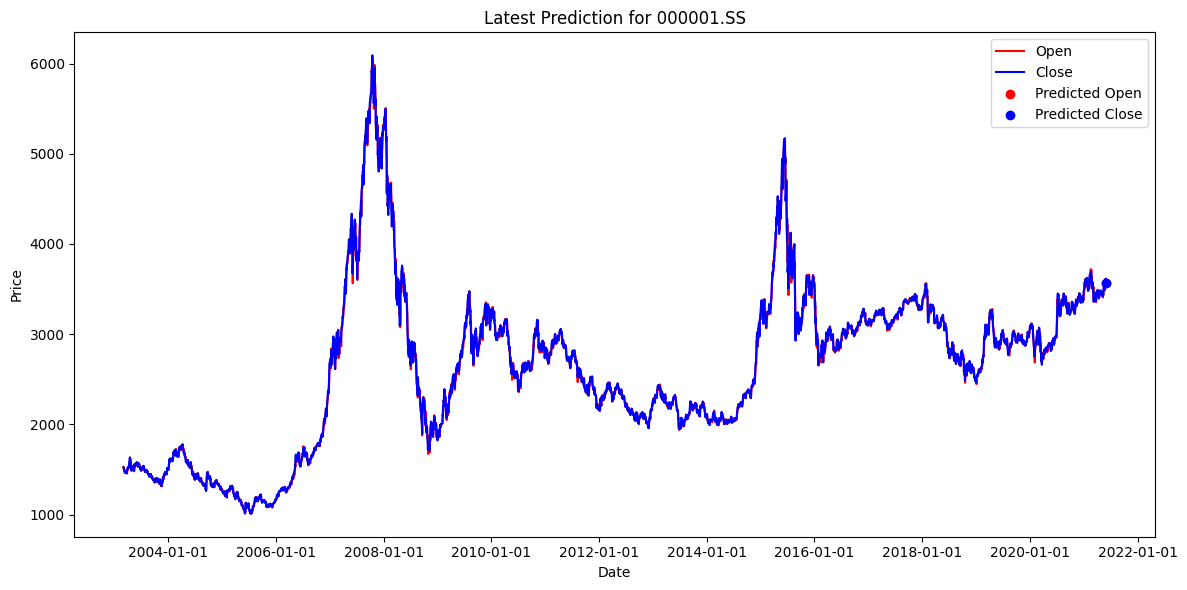

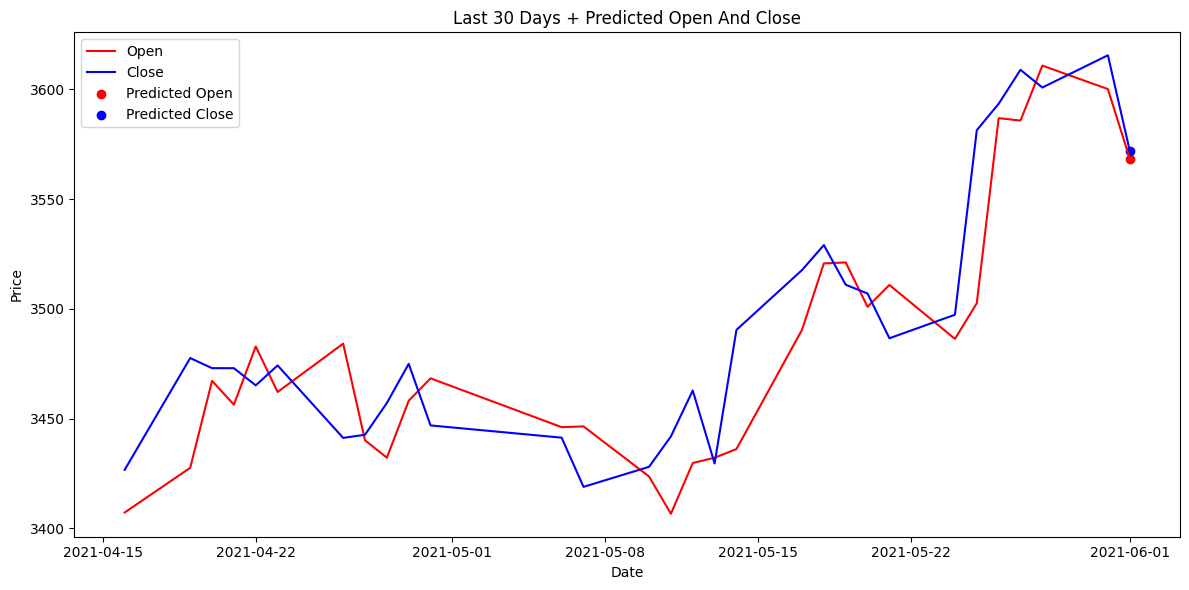

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

plt.figure(figsize=(12, 6))
plt.plot(open_close_df['Date'], open_close_df['Open'], label='Open', color='red')
plt.plot(open_close_df['Date'], open_close_df['Close'], label='Close', color='blue')
plt.scatter(last_date, open_close_df['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, open_close_df['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"Latest Prediction for {df_to_use['Index'].head(1).values[0]}")
plt.legend()
plt.tight_layout()
plt.show()

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Predicted Open And Close')
plt.legend()
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 177ms/step


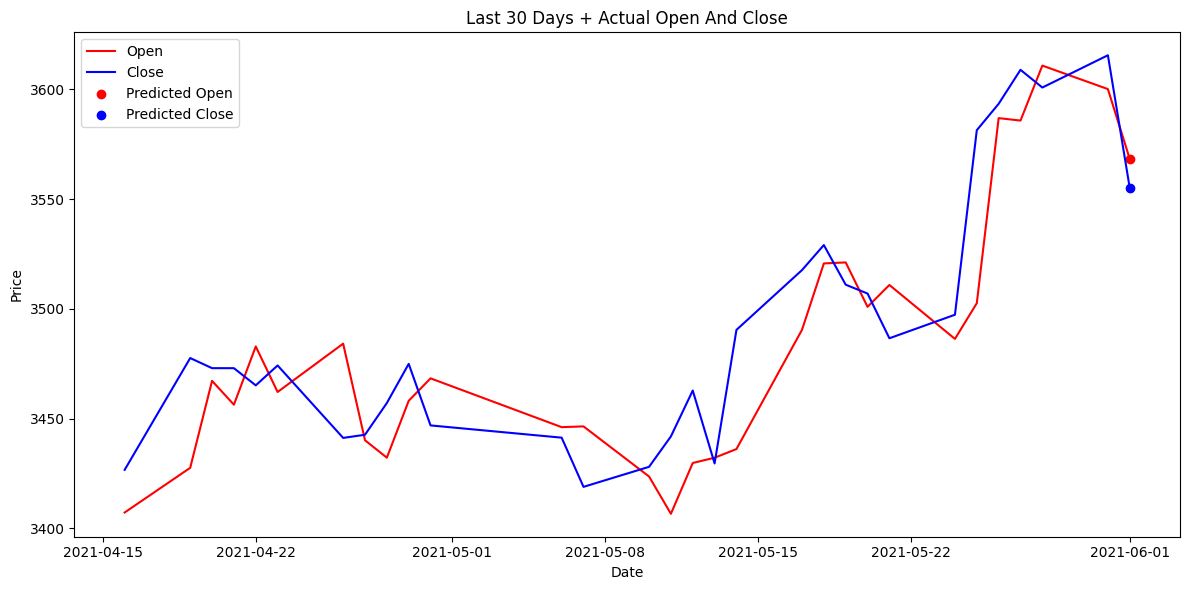

array([[3568.2446, 3555.0396]], dtype=float32)

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length + 1):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Actual Open And Close')
plt.legend()
plt.tight_layout()
plt.show()
last_prediction

In [ ]:
features = ['Open', 'Close']
target = ['Open', 'Close']

df_to_use = jp_df

sequence_length = 30

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length][features].values)
        y.append(data.iloc[i+seq_length][target].values)
    return np.array(X), np.array(y)

scaler = StandardScaler()

X, y = create_sequences(df_to_use, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential([
        LSTM(50, activation='relu', input_shape=(sequence_length, len(features))),
        Dense(2)
    ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

loss, mae = model.evaluate(X_test, y_test)
print(f"Index {df_to_use['Index']}: Test MAE: {mae}")

index = df_to_use['Index'].iloc[0]
data = temp[temp['Index'] == index].iloc[-sequence_length:]
sequence = np.array([data[features].values])
prediction = model.predict(sequence)
print(f"\nPrediction for Index {index}:")
print("Predicted Open:", prediction[0][0])
print("Predicted Close:", prediction[0][1])

29/29 [==============================] - 0s 6ms/step - loss: 158858.8594 - mae: 275.8011
Index 50146    N225
50147    N225
50148    N225
50149    N225
50150    N225
         ... 
54788    N225
54789    N225
54790    N225
54791    N225
54792    N225
Name: Index, Length: 4635, dtype: object: Test MAE: 275.80108642578125
1/1 [==============================] - 0s 194ms/step

Prediction for Index N225:
Predicted Open: 28759.867
Predicted Close: 28692.61


1/1 [==============================] - 0s 27ms/step


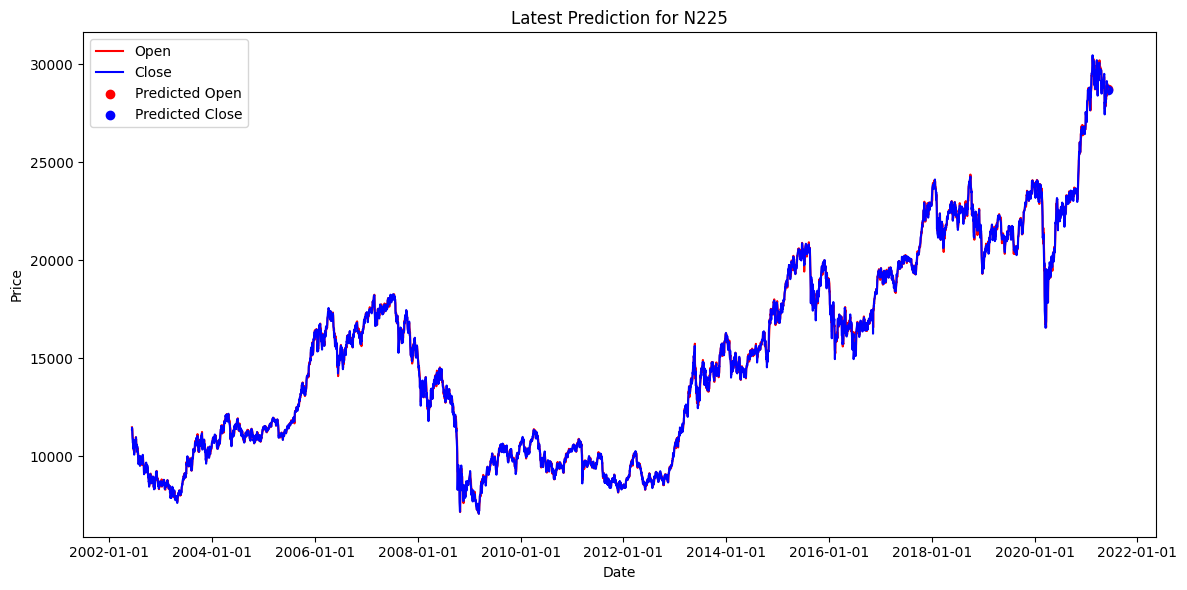

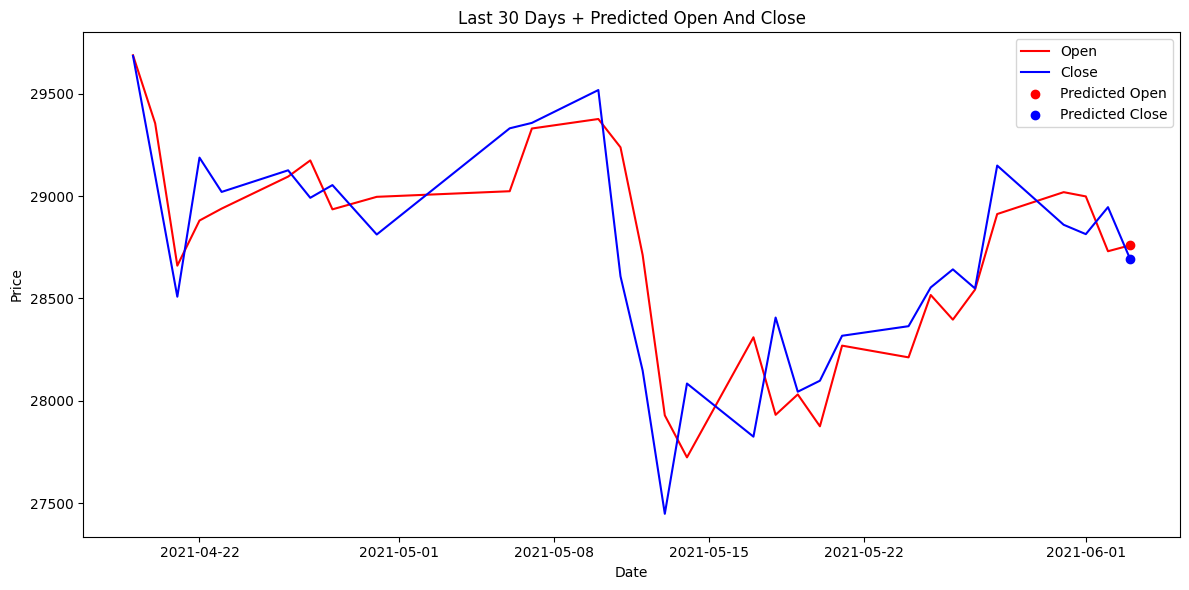

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

plt.figure(figsize=(12, 6))
plt.plot(open_close_df['Date'], open_close_df['Open'], label='Open', color='red')
plt.plot(open_close_df['Date'], open_close_df['Close'], label='Close', color='blue')
plt.scatter(last_date, open_close_df['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, open_close_df['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"Latest Prediction for {df_to_use['Index'].head(1).values[0]}")
plt.legend()
plt.tight_layout()
plt.show()

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Predicted Open And Close')
plt.legend()
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 181ms/step


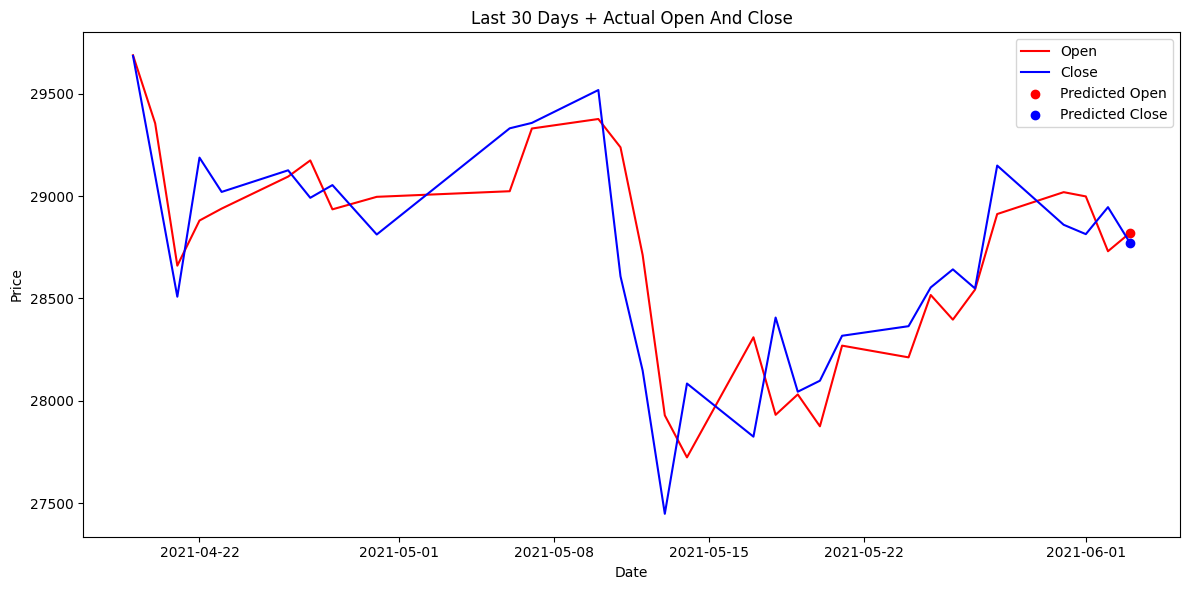

array([[28821.062, 28770.531]], dtype=float32)

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length + 1):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Actual Open And Close')
plt.legend()
plt.tight_layout()
plt.show()
last_prediction

In [ ]:
features = ['Open', 'Close']
target = ['Open', 'Close']

df_to_use = eu_df

sequence_length = 30

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length][features].values)
        y.append(data.iloc[i+seq_length][target].values)
    return np.array(X), np.array(y)

scaler = StandardScaler()

X, y = create_sequences(df_to_use, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential([
        LSTM(50, activation='relu', input_shape=(sequence_length, len(features))),
        Dense(2)
    ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

loss, mae = model.evaluate(X_test, y_test)
print(f"Index {df_to_use['Index']}: Test MAE: {mae}")

example_index = df_to_use['Index'].iloc[0]
example_data = temp[temp['Index'] == example_index].iloc[-sequence_length:]
example_sequence = np.array([example_data[features].values])
example_prediction = model.predict(example_sequence)
print(f"\nExample Prediction for Index {example_index}:")
print("Predicted Open:", example_prediction[0][0])
print("Predicted Close:", example_prediction[0][1])

24/24 [==============================] - 0s 6ms/step - loss: 1830.8822 - mae: 32.4031
Index 56321    N100
56322    N100
56323    N100
56324    N100
56325    N100
         ... 
60263    N100
60264    N100
60265    N100
60266    N100
60267    N100
Name: Index, Length: 3817, dtype: object: Test MAE: 32.403053283691406
1/1 [==============================] - 0s 200ms/step

Example Prediction for Index N100:
Predicted Open: 1202.0028
Predicted Close: 1205.8291


1/1 [==============================] - 0s 23ms/step


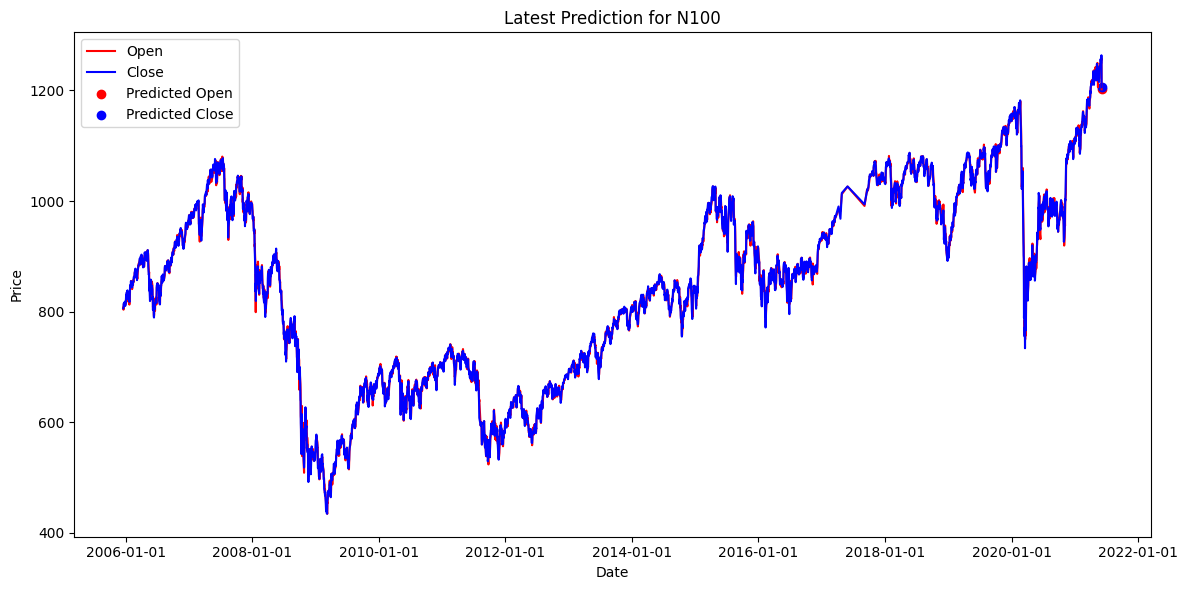

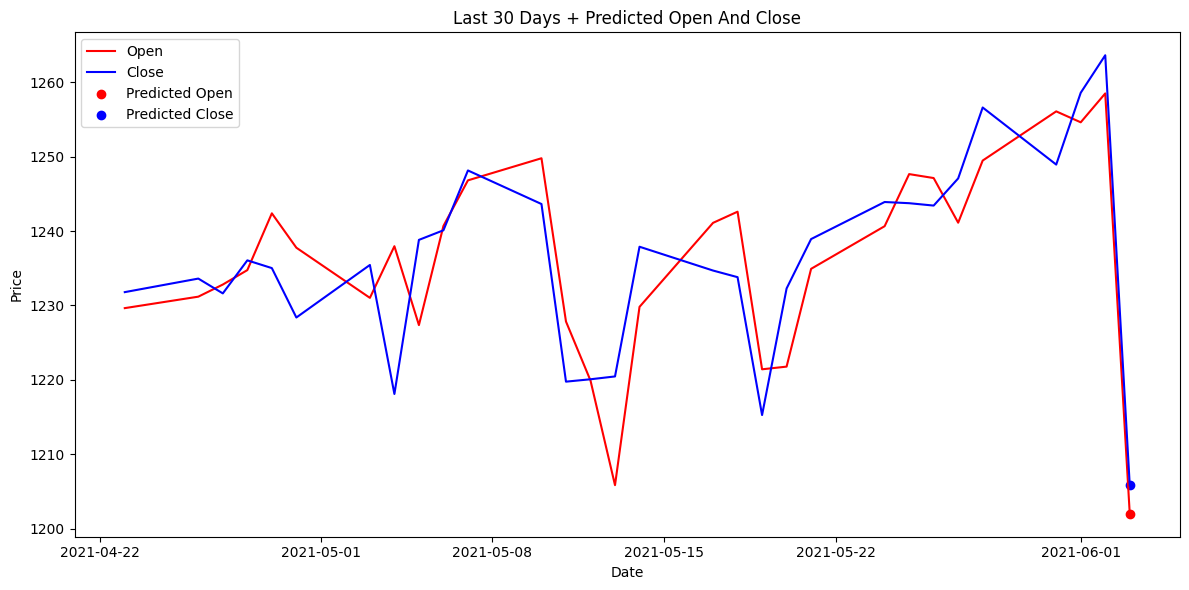

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

plt.figure(figsize=(12, 6))
plt.plot(open_close_df['Date'], open_close_df['Open'], label='Open', color='red')
plt.plot(open_close_df['Date'], open_close_df['Close'], label='Close', color='blue')
plt.scatter(last_date, open_close_df['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, open_close_df['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"Latest Prediction for {df_to_use['Index'].head(1).values[0]}")
plt.legend()
plt.tight_layout()
plt.show()

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Predicted Open And Close')
plt.legend()
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 209ms/step


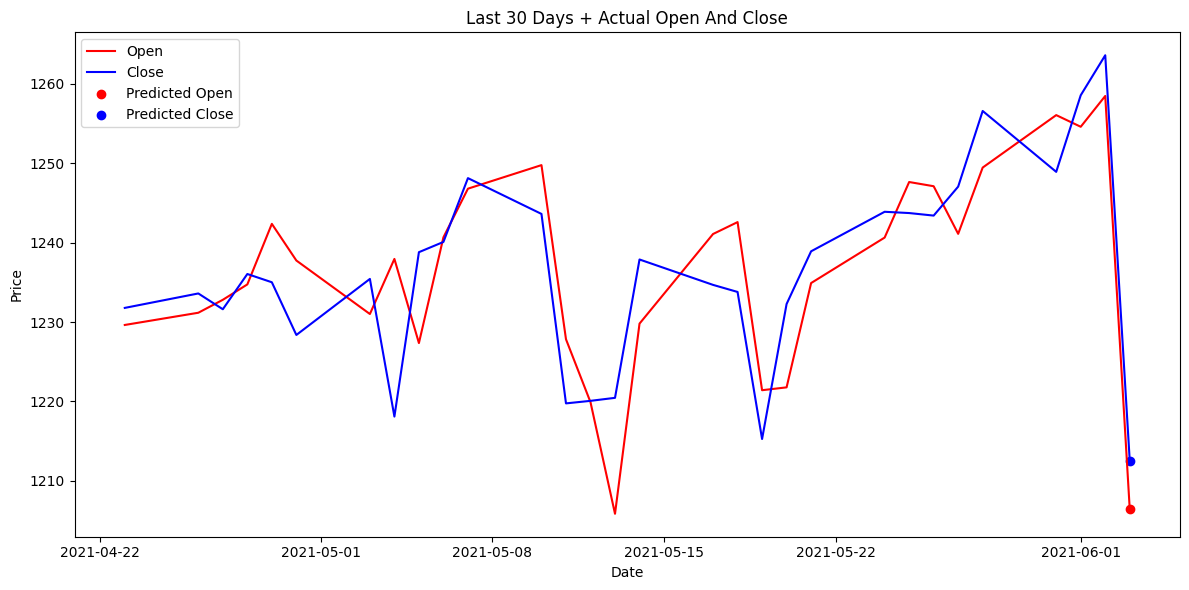

array([[1206.4049, 1212.5109]], dtype=float32)

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length + 1):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Actual Open And Close')
plt.legend()
plt.tight_layout()
plt.show()
last_prediction

In [ ]:
features = ['Open', 'Close']
target = ['Open', 'Close']

df_to_use = sz_df

sequence_length = 30

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length][features].values)
        y.append(data.iloc[i+seq_length][target].values)
    return np.array(X), np.array(y)

scaler = StandardScaler()

X, y = create_sequences(df_to_use, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential([
        LSTM(50, activation='relu', input_shape=(sequence_length, len(features))),
        Dense(2)
    ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

loss, mae = model.evaluate(X_test, y_test)
print(f"Index {df_to_use['Index']}: Test MAE: {mae}")

index = df_to_use['Index'].iloc[0]
data = temp[temp['Index'] == index].iloc[-sequence_length:]
sequence = np.array([data[features].values])
prediction = model.predict(sequence)
print(f"\nPrediction for Index {index}:")
print("Predicted Open:", prediction[0][0])
print("Predicted Close:", prediction[0][1])

26/26 [==============================] - 0s 6ms/step - loss: 116343.6250 - mae: 253.5556
Index 61826    399001.SZ
61827    399001.SZ
61828    399001.SZ
61829    399001.SZ
61830    399001.SZ
           ...    
66023    399001.SZ
66024    399001.SZ
66025    399001.SZ
66026    399001.SZ
66027    399001.SZ
Name: Index, Length: 4190, dtype: object: Test MAE: 253.55560302734375
1/1 [==============================] - 0s 180ms/step

Prediction for Index 399001.SZ:
Predicted Open: 14748.462
Predicted Close: 14619.535


1/1 [==============================] - 0s 23ms/step


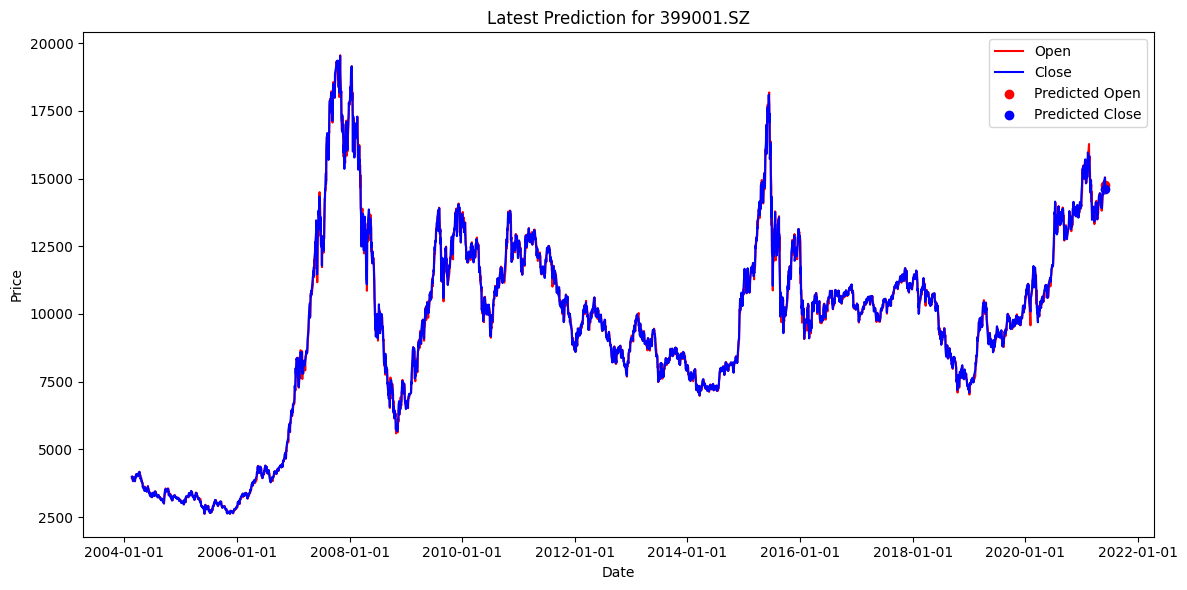

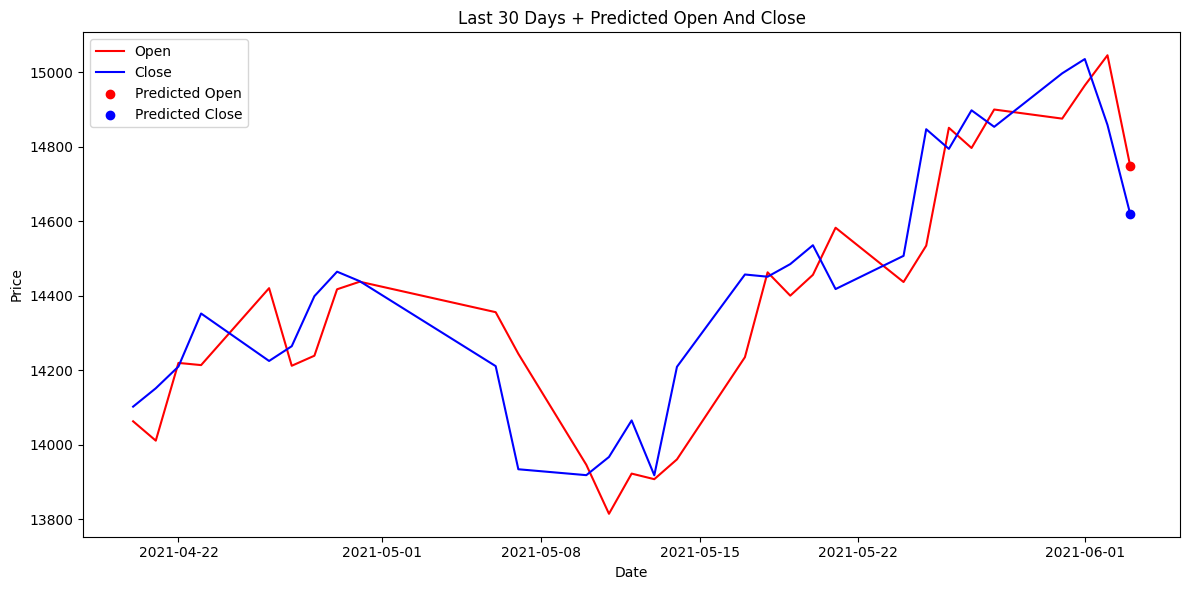

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

plt.figure(figsize=(12, 6))
plt.plot(open_close_df['Date'], open_close_df['Open'], label='Open', color='red')
plt.plot(open_close_df['Date'], open_close_df['Close'], label='Close', color='blue')
plt.scatter(last_date, open_close_df['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, open_close_df['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"Latest Prediction for {df_to_use['Index'].head(1).values[0]}")
plt.legend()
plt.tight_layout()
plt.show()

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Predicted Open And Close')
plt.legend()
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 200ms/step


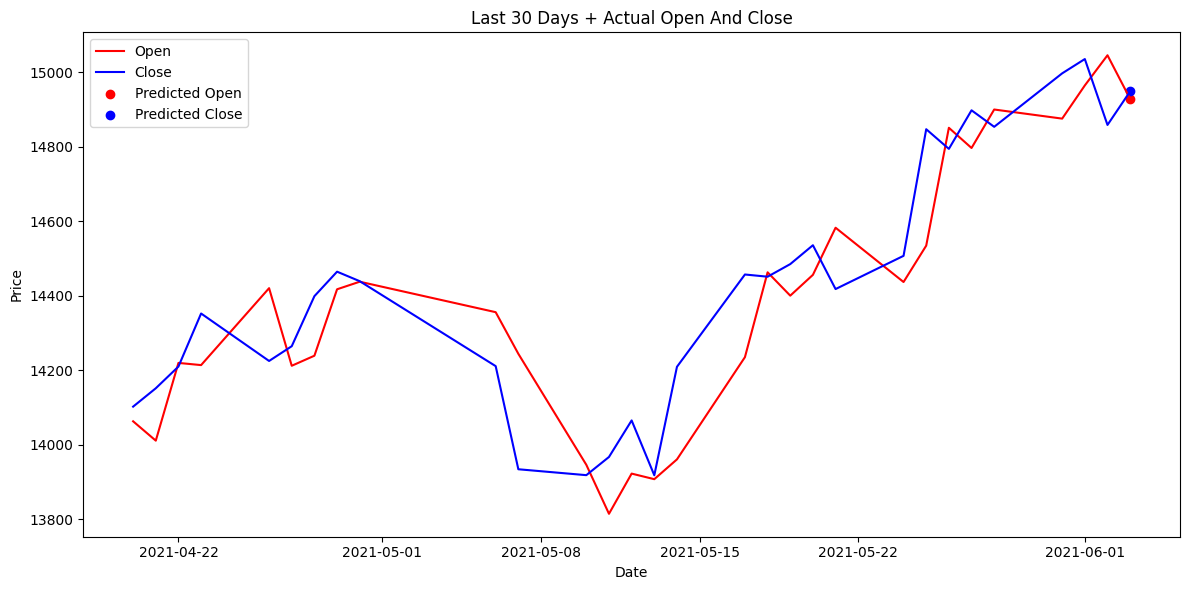

array([[14927.628, 14948.065]], dtype=float32)

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length + 1):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Actual Open And Close')
plt.legend()
plt.tight_layout()
plt.show()
last_prediction

In [ ]:
features = ['Open', 'Close']
target = ['Open', 'Close']

df_to_use = to_df

sequence_length = 30

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length][features].values)
        y.append(data.iloc[i+seq_length][target].values)
    return np.array(X), np.array(y)

scaler = StandardScaler()

X, y = create_sequences(df_to_use, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential([
        LSTM(50, activation='relu', input_shape=(sequence_length, len(features))),
        Dense(2)
    ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

loss, mae = model.evaluate(X_test, y_test)
print(f"Index {df_to_use['Index']}: Test MAE: {mae}")

index = df_to_use['Index'].iloc[0]
data = temp[temp['Index'] == index].iloc[-sequence_length:]
sequence = np.array([data[features].values])
prediction = model.predict(sequence)
print(f"\nPrediction for Index {index}:")
print("Predicted Open:", prediction[0][0])
print("Predicted Close:", prediction[0][1])

58/58 [==============================] - 0s 6ms/step - loss: 48523.4805 - mae: 107.5359
Index 67361    GSPTSE
67362    GSPTSE
67363    GSPTSE
67364    GSPTSE
67365    GSPTSE
          ...  
76549    GSPTSE
76550    GSPTSE
76551    GSPTSE
76552    GSPTSE
76553    GSPTSE
Name: Index, Length: 9183, dtype: object: Test MAE: 107.53592681884766
1/1 [==============================] - 0s 205ms/step

Prediction for Index GSPTSE:
Predicted Open: 19810.879
Predicted Close: 19796.27


1/1 [==============================] - 0s 23ms/step


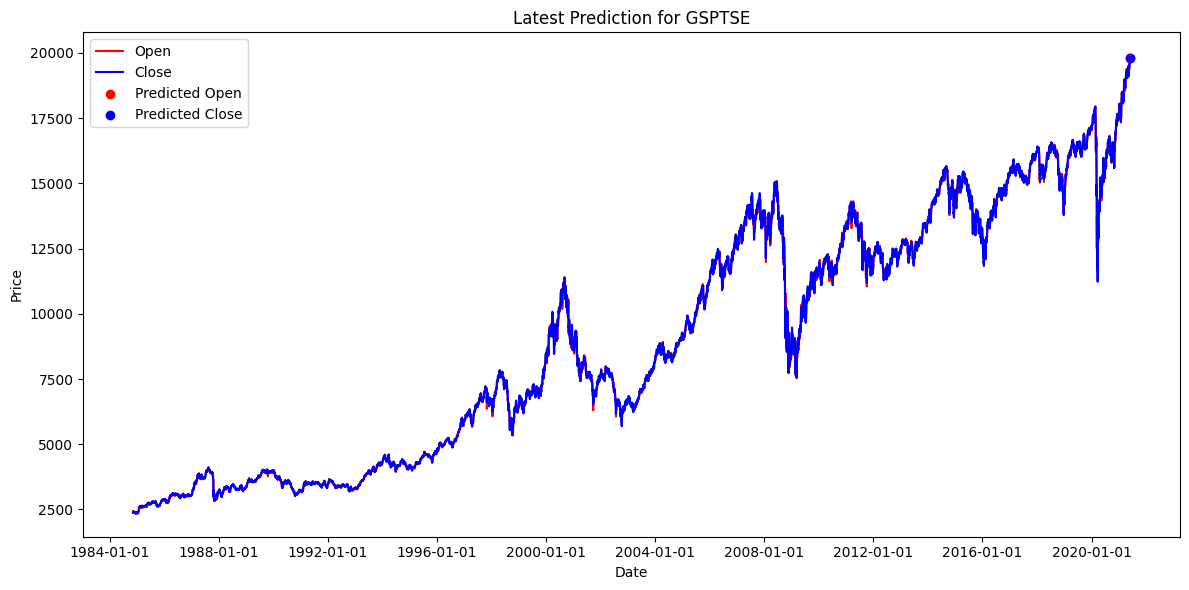

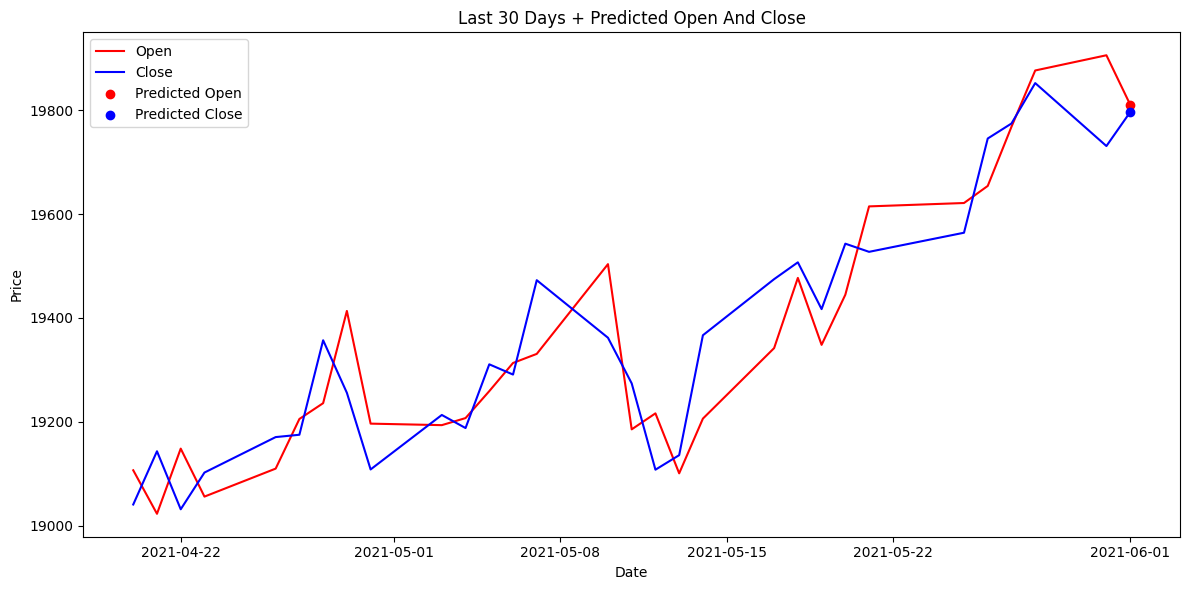

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

plt.figure(figsize=(12, 6))
plt.plot(open_close_df['Date'], open_close_df['Open'], label='Open', color='red')
plt.plot(open_close_df['Date'], open_close_df['Close'], label='Close', color='blue')
plt.scatter(last_date, open_close_df['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, open_close_df['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"Latest Prediction for {df_to_use['Index'].head(1).values[0]}")
plt.legend()
plt.tight_layout()
plt.show()

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Predicted Open And Close')
plt.legend()
plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 207ms/step


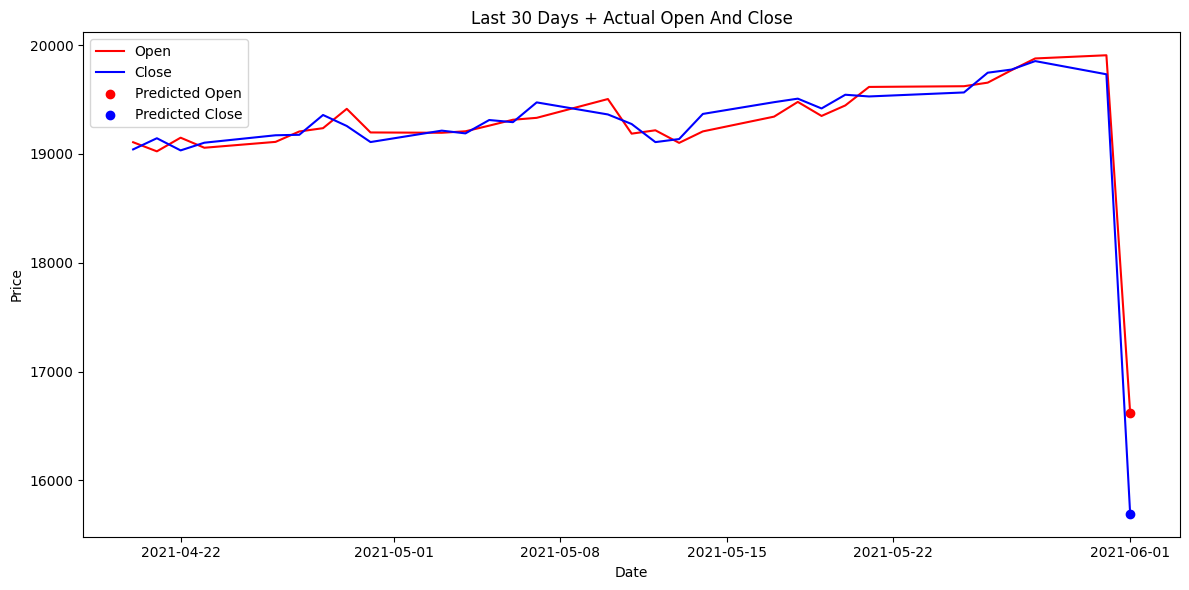

array([[16619.941, 15692.515]], dtype=float32)

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length + 1):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Actual Open And Close')
plt.legend()
plt.tight_layout()
plt.show()
last_prediction

In [ ]:
features = ['Open', 'Close']
target = ['Open', 'Close']

df_to_use = id_df

sequence_length = 30

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length][features].values)
        y.append(data.iloc[i+seq_length][target].values)
    return np.array(X), np.array(y)

scaler = StandardScaler()

X, y = create_sequences(df_to_use, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential([
        LSTM(50, activation='relu', input_shape=(sequence_length, len(features))),
        Dense(2)
    ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

loss, mae = model.evaluate(X_test, y_test)
print(f"Index {df_to_use['Index']}: Test MAE: {mae}")

index = df_to_use['Index'].iloc[0]
data = temp[temp['Index'] == index].iloc[-sequence_length:]
sequence = np.array([data[features].values])
prediction = model.predict(sequence)
print(f"\nPrediction for Index {index}:")
print("Predicted Open:", prediction[0][0])
print("Predicted Close:", prediction[0][1])

13/13 [==============================] - 0s 6ms/step - loss: 335215.1250 - mae: 347.9048
Index 77855    NSEI
77856    NSEI
77857    NSEI
77858    NSEI
77859    NSEI
         ... 
79894    NSEI
79895    NSEI
79896    NSEI
79898    NSEI
79899    NSEI
Name: Index, Length: 2026, dtype: object: Test MAE: 347.9047546386719
1/1 [==============================] - 0s 171ms/step

Prediction for Index NSEI:
Predicted Open: 15067.366
Predicted Close: 15128.121


1/1 [==============================] - 0s 24ms/step


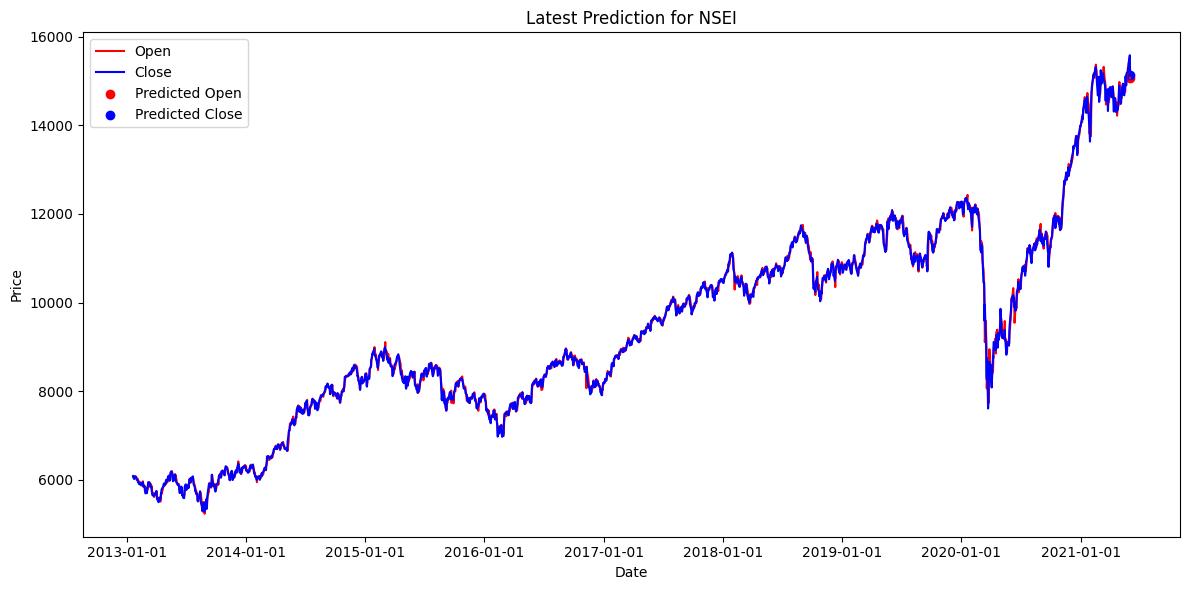

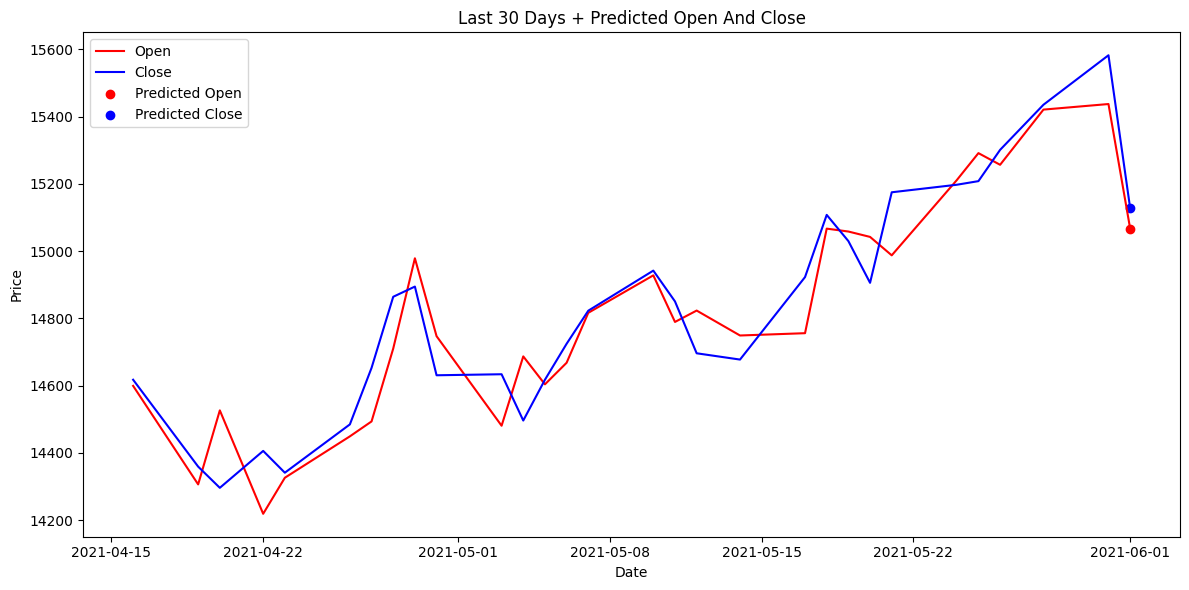

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

plt.figure(figsize=(12, 6))
plt.plot(open_close_df['Date'], open_close_df['Open'], label='Open', color='red')
plt.plot(open_close_df['Date'], open_close_df['Close'], label='Close', color='blue')
plt.scatter(last_date, open_close_df['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, open_close_df['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"Latest Prediction for {df_to_use['Index'].head(1).values[0]}")
plt.legend()
plt.tight_layout()
plt.show()

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Predicted Open And Close')
plt.legend()
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 175ms/step


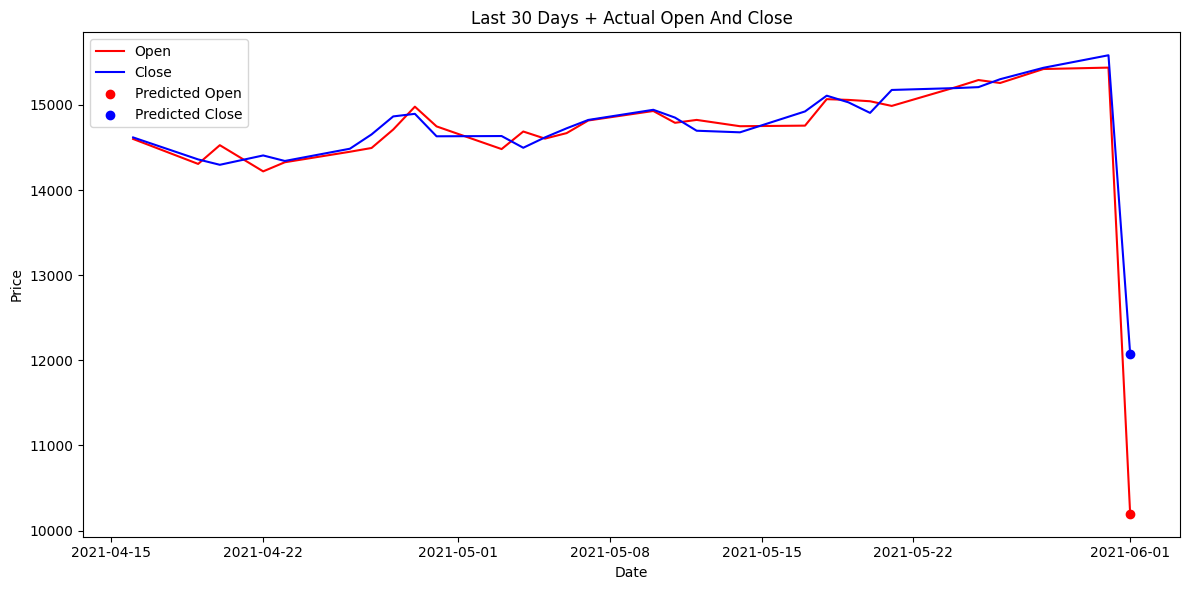

array([[10197.69, 12078.91]], dtype=float32)

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length + 1):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Actual Open And Close')
plt.legend()
plt.tight_layout()
plt.show()
last_prediction

In [ ]:
features = ['Open', 'Close']
target = ['Open', 'Close']

df_to_use = fr_df

sequence_length = 30

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length][features].values)
        y.append(data.iloc[i+seq_length][target].values)
    return np.array(X), np.array(y)

scaler = StandardScaler()

X, y = create_sequences(df_to_use, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential([
        LSTM(50, activation='relu', input_shape=(sequence_length, len(features))),
        Dense(2)
    ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

loss, mae = model.evaluate(X_test, y_test)
print(f"Index {df_to_use['Index']}: Test MAE: {mae}")

index = df_to_use['Index'].iloc[0]
data = temp[temp['Index'] == index].iloc[-sequence_length:]
sequence = np.array([data[features].values])
prediction = model.predict(sequence)
print(f"\nPrediction for Index {index}:")
print("Predicted Open:", prediction[0][0])
print("Predicted Close:", prediction[0][1])

34/34 [==============================] - 0s 7ms/step - loss: 194961.1719 - mae: 300.5965
Index 82865    GDAXI
82866    GDAXI
82867    GDAXI
82868    GDAXI
82869    GDAXI
         ...  
88333    GDAXI
88334    GDAXI
88335    GDAXI
88336    GDAXI
88337    GDAXI
Name: Index, Length: 5464, dtype: object: Test MAE: 300.5964660644531
1/1 [==============================] - 0s 176ms/step

Prediction for Index GDAXI:
Predicted Open: 15218.086
Predicted Close: 15146.7


1/1 [==============================] - 0s 24ms/step


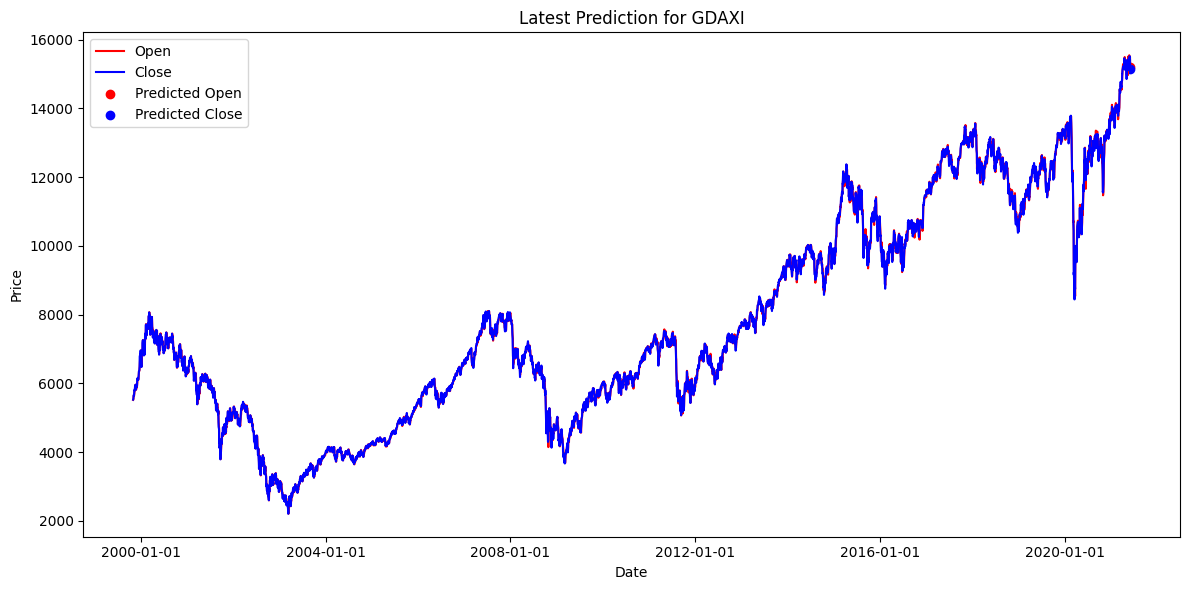

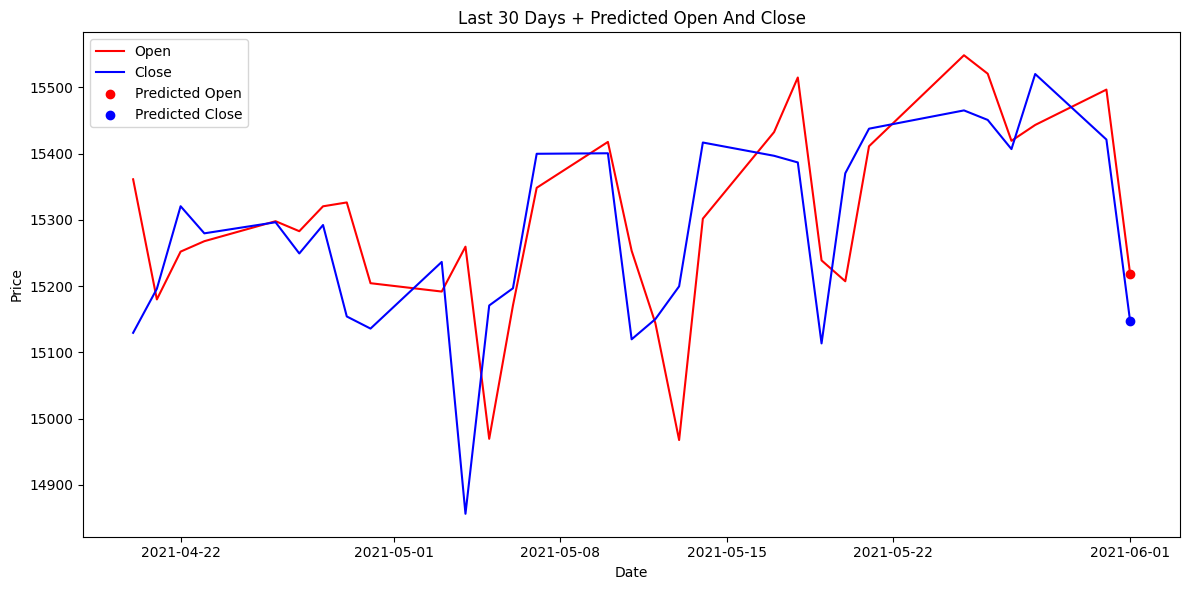

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

plt.figure(figsize=(12, 6))
plt.plot(open_close_df['Date'], open_close_df['Open'], label='Open', color='red')
plt.plot(open_close_df['Date'], open_close_df['Close'], label='Close', color='blue')
plt.scatter(last_date, open_close_df['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, open_close_df['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"Latest Prediction for {df_to_use['Index'].head(1).values[0]}")
plt.legend()
plt.tight_layout()
plt.show()

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Predicted Open And Close')
plt.legend()
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 181ms/step


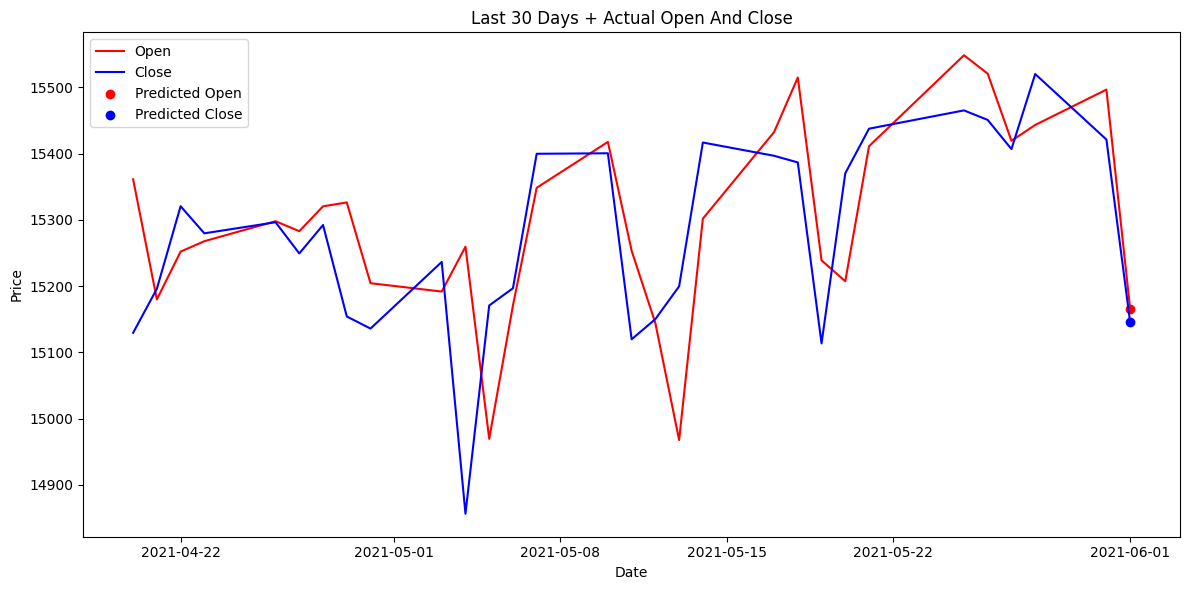

array([[15165.544, 15145.268]], dtype=float32)

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length + 1):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Actual Open And Close')
plt.legend()
plt.tight_layout()
plt.show()
last_prediction

In [ ]:
features = ['Open', 'Close']
target = ['Open', 'Close']

df_to_use = sw_df

sequence_length = 30

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length][features].values)
        y.append(data.iloc[i+seq_length][target].values)
    return np.array(X), np.array(y)

scaler = StandardScaler()

X, y = create_sequences(df_to_use, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential([
        LSTM(50, activation='relu', input_shape=(sequence_length, len(features))),
        Dense(2)
    ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

loss, mae = model.evaluate(X_test, y_test)
print(f"Index {df_to_use['Index']}: Test MAE: {mae}")

index = df_to_use['Index'].iloc[0]
data = temp[temp['Index'] == index].iloc[-sequence_length:]
sequence = np.array([data[features].values])
prediction = model.predict(sequence)
print(f"\nPrediction for Index {index}:")
print("Predicted Open:", prediction[0][0])
print("Predicted Close:", prediction[0][1])

29/29 [==============================] - 0s 6ms/step - loss: 84996.2266 - mae: 178.4409
Index 91372    SSMI
91373    SSMI
91374    SSMI
91375    SSMI
91376    SSMI
         ... 
96004    SSMI
96005    SSMI
96006    SSMI
96007    SSMI
96008    SSMI
Name: Index, Length: 4632, dtype: object: Test MAE: 178.4408721923828
1/1 [==============================] - 0s 194ms/step

Prediction for Index SSMI:
Predicted Open: 11265.955
Predicted Close: 11243.387


1/1 [==============================] - 0s 27ms/step


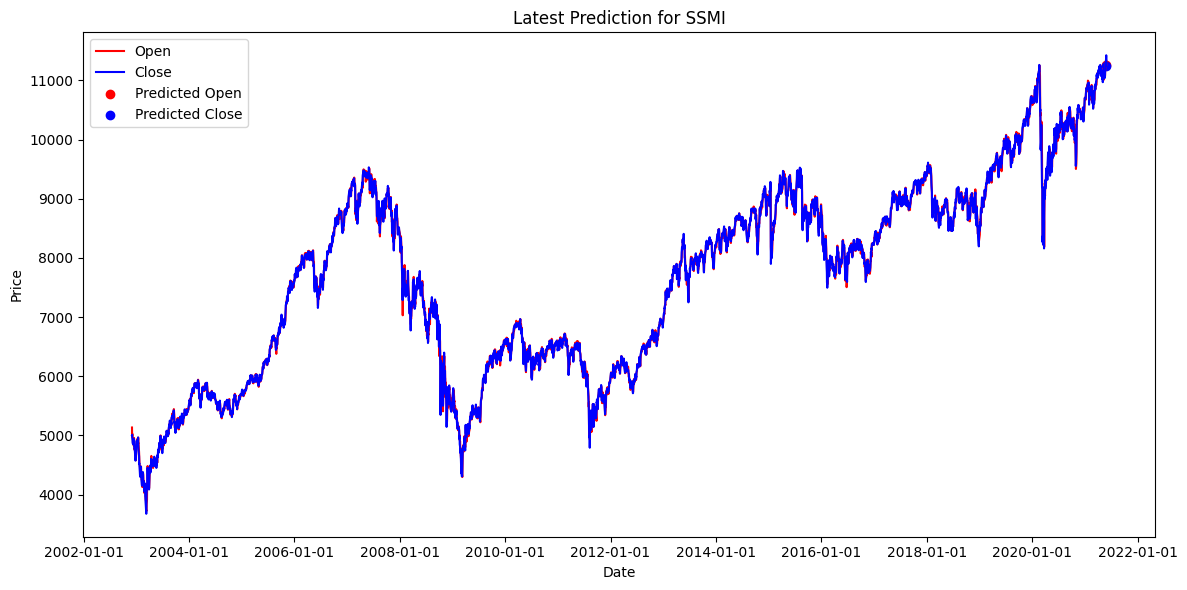

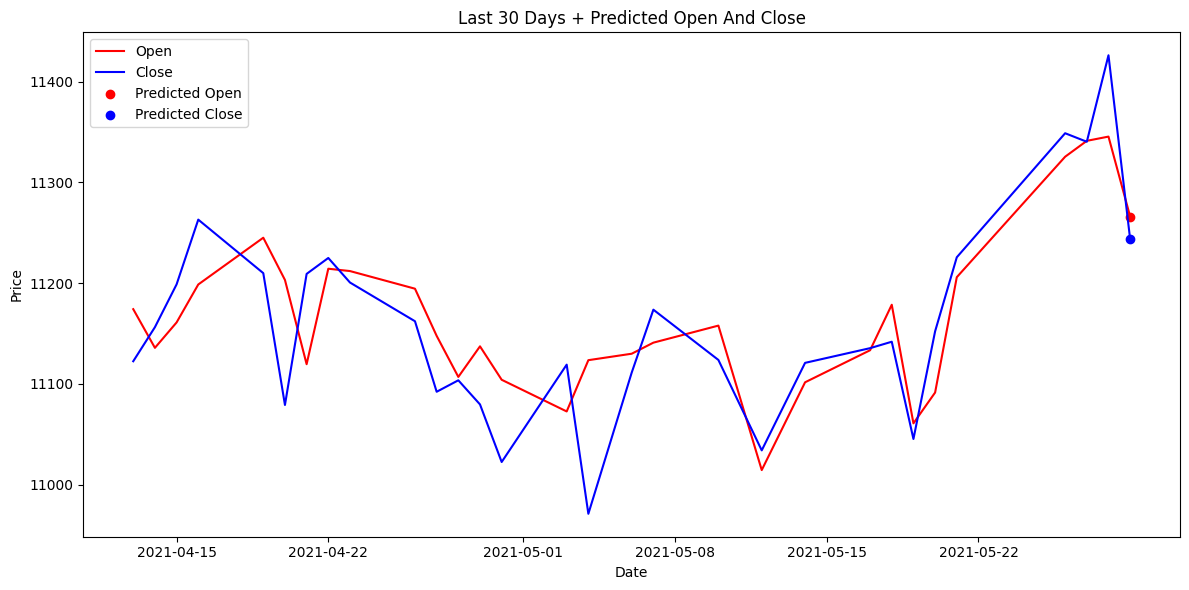

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

plt.figure(figsize=(12, 6))
plt.plot(open_close_df['Date'], open_close_df['Open'], label='Open', color='red')
plt.plot(open_close_df['Date'], open_close_df['Close'], label='Close', color='blue')
plt.scatter(last_date, open_close_df['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, open_close_df['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"Latest Prediction for {df_to_use['Index'].head(1).values[0]}")
plt.legend()
plt.tight_layout()
plt.show()

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Predicted Open And Close')
plt.legend()
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 206ms/step


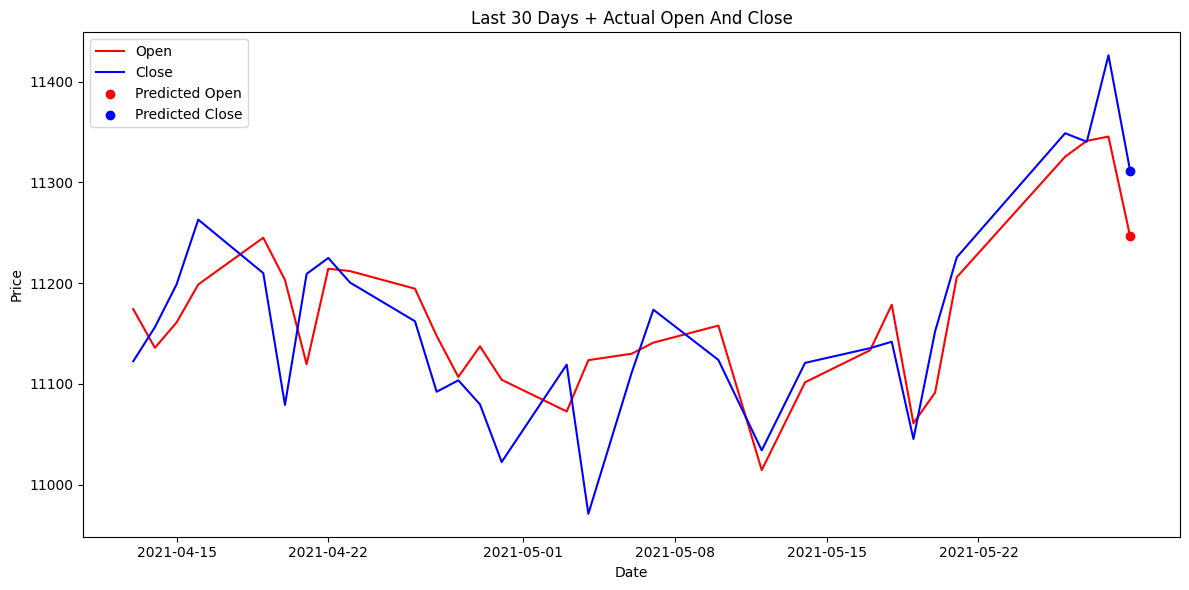

array([[11246.287, 11311.283]], dtype=float32)

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length + 1):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Actual Open And Close')
plt.legend()
plt.tight_layout()
plt.show()
last_prediction

In [ ]:
features = ['Open', 'Close']
target = ['Open', 'Close']

df_to_use = tw_df

sequence_length = 30

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length][features].values)
        y.append(data.iloc[i+seq_length][target].values)
    return np.array(X), np.array(y)

scaler = StandardScaler()

X, y = create_sequences(df_to_use, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential([
        LSTM(50, activation='relu', input_shape=(sequence_length, len(features))),
        Dense(2)
    ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

loss, mae = model.evaluate(X_test, y_test)
print(f"Index {df_to_use['Index']}: Test MAE: {mae}")

index = df_to_use['Index'].iloc[0]
data = temp[temp['Index'] == index].iloc[-sequence_length:]
sequence = np.array([data[features].values])
prediction = model.predict(sequence)
print(f"\nPrediction for Index {index}:")
print("Predicted Open:", prediction[0][0])
print("Predicted Close:", prediction[0][1])

29/29 [==============================] - 0s 7ms/step - loss: 21201.3535 - mae: 101.3449
Index 97357     TWII
97358     TWII
97359     TWII
97360     TWII
97361     TWII
          ... 
101873    TWII
101874    TWII
101875    TWII
101876    TWII
101877    TWII
Name: Index, Length: 4516, dtype: object: Test MAE: 101.3448715209961
1/1 [==============================] - 0s 229ms/step

Prediction for Index TWII:
Predicted Open: 16834.0
Predicted Close: 16736.748


1/1 [==============================] - 0s 24ms/step


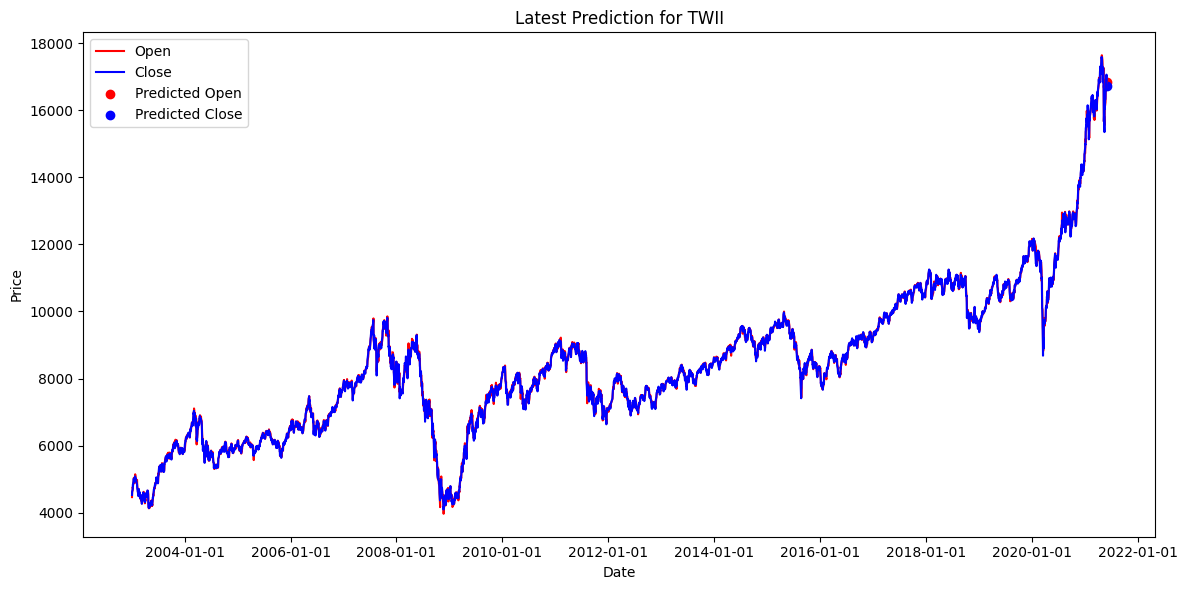

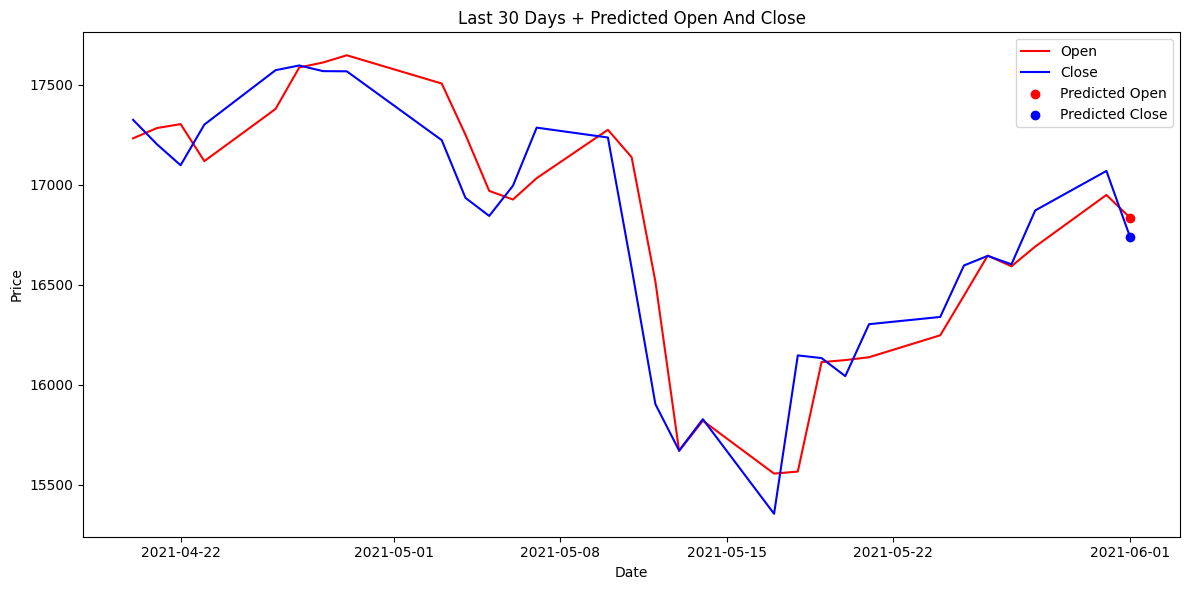

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

plt.figure(figsize=(12, 6))
plt.plot(open_close_df['Date'], open_close_df['Open'], label='Open', color='red')
plt.plot(open_close_df['Date'], open_close_df['Close'], label='Close', color='blue')
plt.scatter(last_date, open_close_df['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, open_close_df['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"Latest Prediction for {df_to_use['Index'].head(1).values[0]}")
plt.legend()
plt.tight_layout()
plt.show()

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Predicted Open And Close')
plt.legend()
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 190ms/step


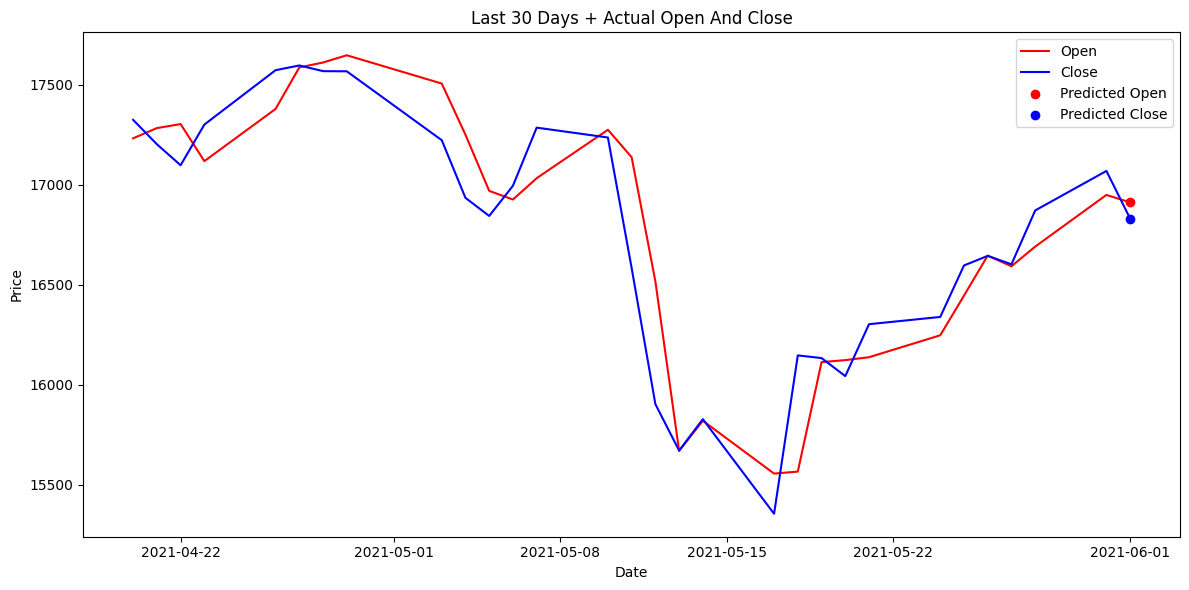

array([[16911.148, 16830.148]], dtype=float32)

In [ ]:
open_close_df = df_to_use[['Date', 'Open', 'Close']].copy()

last_date = df_to_use.iloc[-(sequence_length + 1):]
last_sequence = np.array([last_date[features].values])
last_prediction = model.predict(last_sequence)

last_date = pd.to_datetime(df_to_use['Date'].tail(1).values[0]) + pd.DateOffset(1)

open_close_df.loc[len(open_close_df)] = [last_date, last_prediction[0][0], last_prediction[0][1]]

OC_30 = open_close_df.tail(30)

plt.figure(figsize=(12, 6))
plt.plot(OC_30['Date'], OC_30['Open'], label='Open', color='red')
plt.plot(OC_30['Date'], OC_30['Close'], label='Close', color='blue')
plt.scatter(last_date, OC_30['Open'].iloc[-1], color='red', label='Predicted Open')
plt.scatter(last_date, OC_30['Close'].iloc[-1], color='blue', label='Predicted Close')

plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Last 30 Days + Actual Open And Close')
plt.legend()
plt.tight_layout()
plt.show()
last_prediction

Here we manually input all the data using MAE, MAPE, and RMSE to measure to measure the accuracy. We compared to the predicted to the actual opening and closing prices of the last day of each index so the model could have the most data possible to train on.

In [ ]:
indexes = ["NYA", "IXIC", "HSI", "000001.SS", "N225", "N100", "399001.SZ", "GSPTSE", "NSEI", "GDAXI", "SSMI", "TWII"]
#data straight from above listed in the same order as indexes
predicted_open = np.array([17583.465, 13725.474, 28530.895,3568.2446, 28821.062, 1206.4049,14927.628,  16619.941, 10197.69, 15165.544, 11246.287, 16911.148])
actual_open = np.array([16531.949220, 13792.049810, 29225.46094,3600.070068, 28730.81055,1258.489990, 15044.940430, 19905.800780, 15437.750000, 15437.750000, 11345.400390, 16948.470700])
predicted_close = np.array([18004.535, 13751.977, 28100.67, 3555.0396, 28770.531, 1212.5109, 14948.065, 15692.515, 12078.91, 15145.268, 11311.283, 16830.148])
actual_close = np.array([16555.660160, 13748.740230, 29151.80078,3615.479980, 28946.14063, 1263.619995, 14857.910160, 19731.000000, 15582.799810, 15582.799810, 11426.150390, 17068.429690])
#made function for calculting mae, mape, and rmse
def calculate_metrics(pred, act):
    mae = np.mean(np.abs(pred - act))
    mape = np.mean((np.abs(pred - act) / act) * 100)
    rmse = np.sqrt(np.mean((pred - act) ** 2))
    return mae, mape, rmse

mae_open, mape_open, rmse_open = calculate_metrics(predicted_open, actual_open)
mae_close, mape_close, rmse_close = calculate_metrics(predicted_close, actual_close)
#prints out a general stat for all the indexes
print(f"Opening Prices - MAE: {mae_open:.2f}, MAPE: {mape_open:.2f}%, RMSE: {rmse_open:.2f}")
print(f"Closing Prices - MAE: {mae_close:.2f}, MAPE: {mape_close:.2f}%, RMSE: {rmse_close:.2f}")
#prints out all the indexes and their stats
for i, index in enumerate(indexes):
    mae_o, mape_o, rmse_o = calculate_metrics(np.array([predicted_open[i]]), np.array([actual_open[i]]))
    mae_c, mape_c, rmse_c = calculate_metrics(np.array([predicted_close[i]]), np.array([actual_close[i]]))
    print(f"Index {index}:")
    print(f"  Predicted Opening: {predicted_open[i]:.2f}, Actual Opening: {actual_open[i]:.2f}")
    print(f"  Predicted Closing: {predicted_close[i]:.2f}, Actual Closing: {actual_close[i]:.2f}")
    print(f"  Opening - MAE: {mae_o:.2f}, MAPE: {mape_o:.2f}%, RMSE: {rmse_o:.2f}")
    print(f"  Closing - MAE: {mae_c:.2f}, MAPE: {mape_c:.2f}%, RMSE: {rmse_c:.2f}\n")

Opening Prices - MAE: 919.89, MAPE: 5.72%, RMSE: 1824.80
Closing Prices - MAE: 934.47, MAPE: 5.62%, RMSE: 1635.48
Index NYA:
  Predicted Opening: 17583.47, Actual Opening: 16531.95
  Predicted Closing: 18004.53, Actual Closing: 16555.66
  Opening - MAE: 1051.52, MAPE: 6.36%, RMSE: 1051.52
  Closing - MAE: 1448.87, MAPE: 8.75%, RMSE: 1448.87

Index IXIC:
  Predicted Opening: 13725.47, Actual Opening: 13792.05
  Predicted Closing: 13751.98, Actual Closing: 13748.74
  Opening - MAE: 66.58, MAPE: 0.48%, RMSE: 66.58
  Closing - MAE: 3.24, MAPE: 0.02%, RMSE: 3.24

Index HSI:
  Predicted Opening: 28530.90, Actual Opening: 29225.46
  Predicted Closing: 28100.67, Actual Closing: 29151.80
  Opening - MAE: 694.57, MAPE: 2.38%, RMSE: 694.57
  Closing - MAE: 1051.13, MAPE: 3.61%, RMSE: 1051.13

Index 000001.SS:
  Predicted Opening: 3568.24, Actual Opening: 3600.07
  Predicted Closing: 3555.04, Actual Closing: 3615.48
  Opening - MAE: 31.83, MAPE: 0.88%, RMSE: 31.83
  Closing - MAE: 60.44, MAPE: 1.6

# Insights and Conclusions

**Final Exploratory Data Analysis Conclusions:**

We concluded that since each index has different volumes due to their representations of different economies, we would need to separate the indexes to do analysis separately.
To show conclusive proof that comparing all the indexes together for analysis won't work, we did a many statistical tests including a p value test in which we got a p value of 0 meaning very very nearly impossible chance that there is correlation between volume and price changes when averaging and comparing all the indexes together as one set of data.
We concluded that there is in fact some sort of relationship between the change in the volume and the price change when comparing the indexes separately by applying statistical tests and modeling. We showed through the lines of best fit the evidence for volume and price change does exist and is positive. So after performing data cleaning and some basic analysis, we concluded that volume and price change were the variables with the highest correlation.

**Machine Learning Conclusion:**

For the Machine Learning part of this project, we used the Supervised Machine Learning method called LSTM (Long Short-Term Memory) which is a type of recurrent neural network that analyzes sequential data just like our stock market indexes data.
For the input, we used the 14 different stock indexes with their historical data that we cleaned up. We used multiple LSTM layers to train the model to predict the opening and closing prices of a stock index based on the previous number of days we choose to use to predict the next day’s opening and closing value for that day. For example, in our project we would use the opening and closing data of Jan 1st through Jan 30th, 1986 and use those trends to predict the opening and closing prices for Jan 31st, 1986. We would repeat this process over and over until we get to 2021.

**Final Conclusions: Our Findings and Implications:**

We defined the metrics of accuracy using MAE, MAPE, and RMSE. MAE (Mean Absolute Error) is used to measure the absolute differences between the actual and predicted close and opening prices. MAPE (Mean Absolute Percentage Error) is used to measure the accuracy in percents. MAPE values less than 20% are generally considered to be accurate. RMSE (Root Mean Squared Error) is used to measure the magnitude of the error.  
We concluded that using previous trends, the machine learning model did not have enough information to be 100% accurate.
Mid Accuracy Indexes: NYA, N100, GSPTSE, NSEI
High Accuracy Indexes: IXIC, 000001.SS, HSI, N225, 399001.SZ, GDAXI, SSMI, TWII
Although the Machine Learning model was unable to be 100% accurate, the only data it was using was the previous opening and closing price data. This Machine Learning model was able to predict 10/12 stock indexes’ opening and closing price with a MAPE of less than 10% and just two exceeded the 20% threshold. In terms of MAE, we have to take into consideration the context. Since these prices are tens of thousands, MAE in the hundreds and low thousands would be considered accurate. Almost all the indexes fall within the acceptable range which for our purpose has been defined to be a less than a 10% absolute difference. With the exception of NYA, GSPTSE, NSEI stock indexes, all other indexes fall within the acceptable accuracy range. By comparing all the indexes, we can compare the average MAE, MAPE, and RMSE and see that these values all fall within the 10% accuracy range making this machine model a pretty good predictor of the next day’s opening and closing prices. Sidenote: most days, the percentage change of the stock market does not change much so our metrics of success and accuracy are pretty low compared to what is needed in the stock market prediction industry. But given that we are only working with a few databases, this machine learning model is a proof of concept that we can use machine learning to predict opening and closing stock prices. With more data and more variables for the model to train on, we are confident that Machine Learning is capable of predicting opening and closing stock prices more accurately.

Each Index has different predictability/volatility. We found that our Machine Learning Model was able to predict the IXIC, 000001.SS, HSI, N225, 399001.SZ, GDAXI, SSMI, and TWII Stock Indexes were in general more accurately than the NYA, N100, GSPTSE, NSEI Stock Indexes.
If we had more time, we would add volume as a parameter to this prediction. Using volume as another parameter, this Machine Learning model would be more accurate and able to predict the change in price in real time as we give it updated volume data everyday.

All in all this was a fun project and we hope you enjoyed reading it as we did making this.
